## Quantum Galton Board

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-Aer
# !pip install qiskit-transpile
!pip install qiskit-aer
!pip install qiskit-visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=44697295cecfca71c1663795572358db32950c4075fa03f355f6adbdd95eefd2
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement qiskit-visualization (from versions: none)
ERROR: No matching distribution found for qiskit-visualization


In [2]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


In [3]:
from qiskit import QuantumCircuit, transpile # Corrected import
from qiskit.visualization import plot_histogram
import random
from qiskit_aer import AerSimulator

# Peg (Mentioned in the paper)

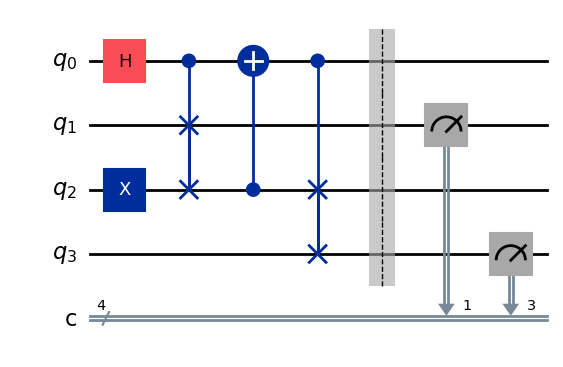

In [4]:
peg = QuantumCircuit(4,4)
peg.h(0)
peg.x(2)
peg.cswap(0,1,2)
peg.cx(2,0)
peg.cswap(0,2,3)
peg.barrier()
peg.measure([1,3], [1,3])
peg.draw('mpl')

#4 layered Galton Board


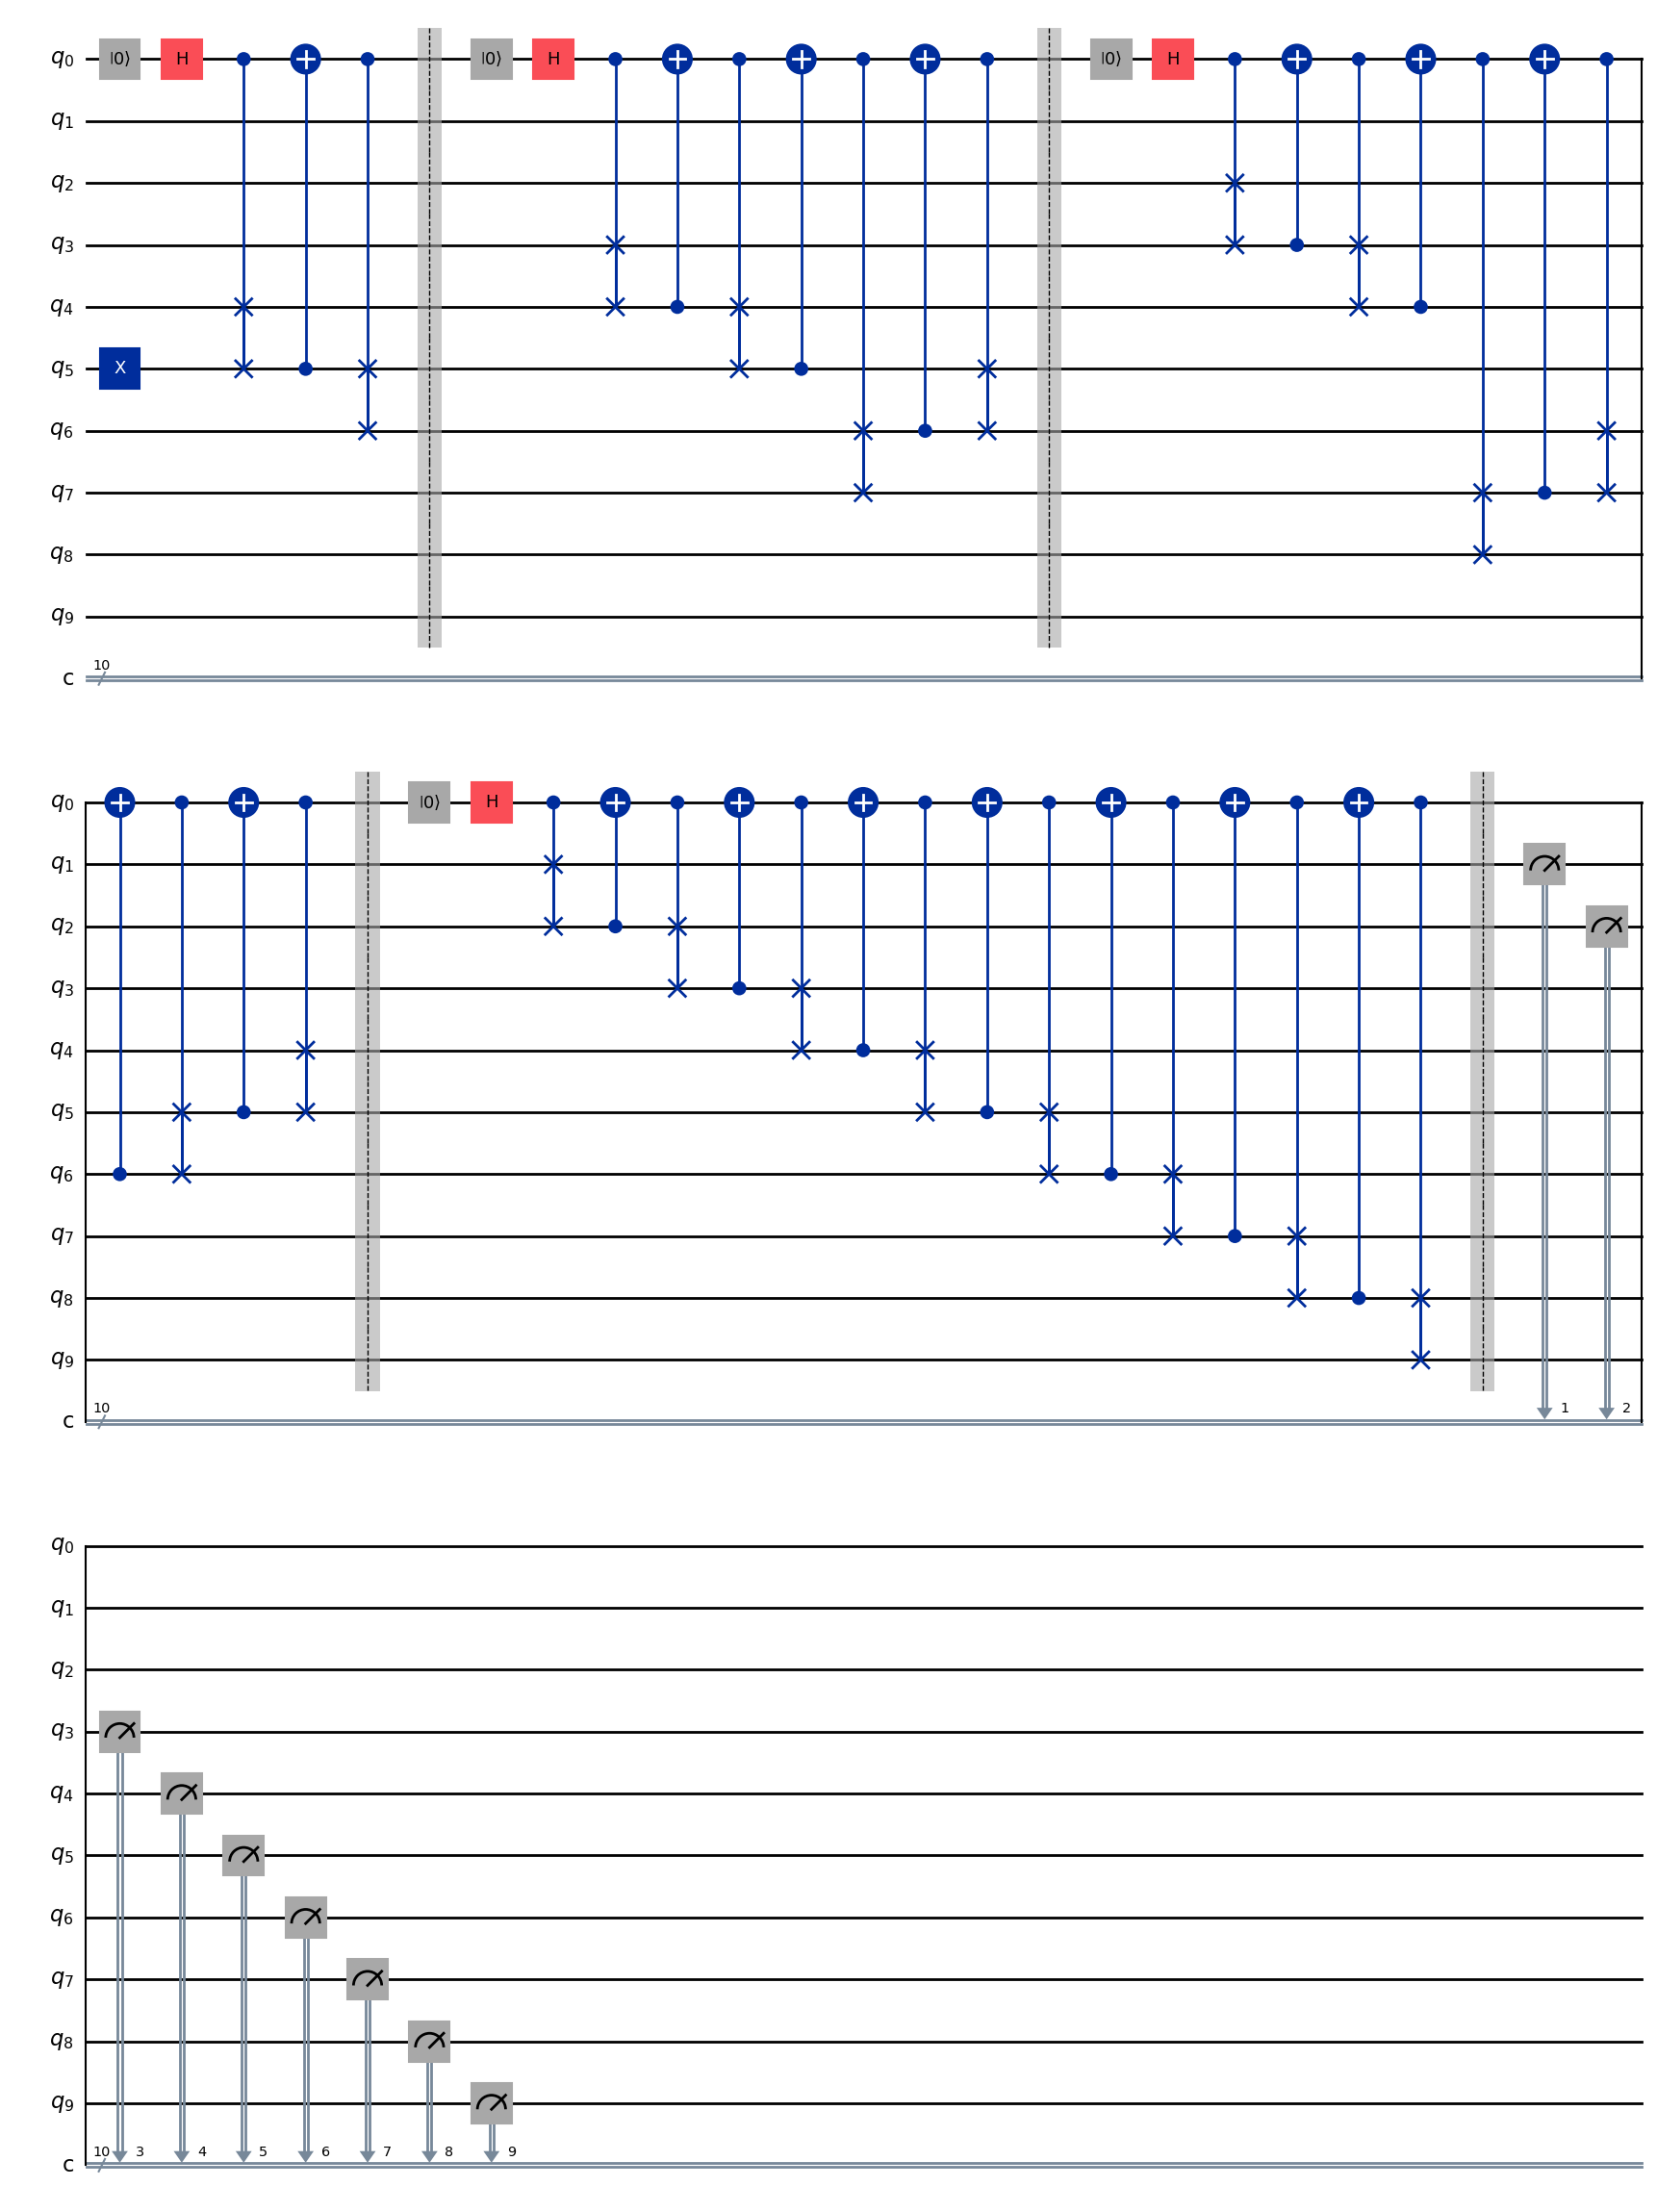

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import random
from qiskit_aer import AerSimulator


q = QuantumCircuit(10,10)

#layer1

q.reset(0)
q.x(5)
q.h(0)
q.cswap(0,4,5)
q.cx(5,0)
q.cswap(0,5,6)
q.barrier()

#layer2
q.reset(0)
q.h(0)
q.cswap(0,3,4)
q.cx(4,0)
q.cswap(0,4,5)
q.cx(5,0)
q.cswap(0,6,7)
q.cx(6,0)
q.cswap(0,5,6)
q.barrier()

#layer3

q.reset(0)
q.h(0)
q.cswap(0,2,3)
q.cx(3,0)
q.cswap(0,3,4)
q.cx(4,0)
q.cswap(0,7,8)
q.cx(7,0)
q.cswap(0,6,7)
q.cx(6,0)
q.cswap(0,5,6)
q.cx(5,0)
q.cswap(0,4,5)
q.barrier()

#layer4

q.reset(0)
q.h(0)
q.cswap(0,1,2)
q.cx(2,0)
q.cswap(0,2,3)
q.cx(3,0)
q.cswap(0,3,4)
q.cx(4,0)
q.cswap(0,4,5)
q.cx(5,0)
q.cswap(0,5,6)
q.cx(6,0)
q.cswap(0,6,7)
q.cx(7,0)
q.cswap(0,7,8)
q.cx(8,0)
q.cswap(0,8,9)
q.barrier()
q.measure(1,1)
q.measure(2,2)
q.measure(3,3)
q.measure(4,4)
q.measure(5,5)
q.measure(6,6)
q.measure(7,7)
q.measure(8,8)
q.measure(9,9)


q.draw('mpl')

counts: {'0000100000': 794, '1000000000': 111, '0000000010': 115, '0000001000': 510, '0010000000': 518}


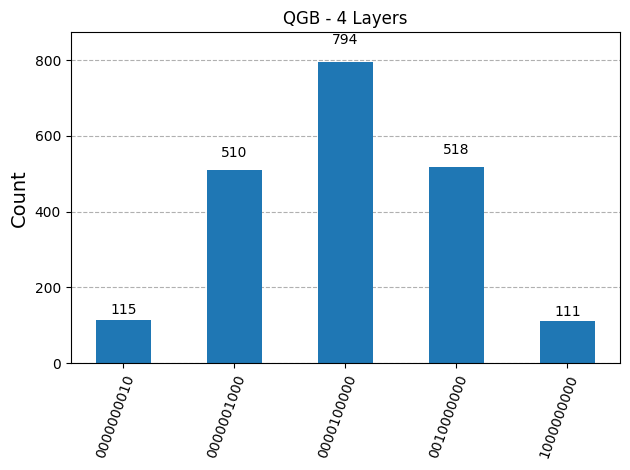

In [7]:
# Simulate
simulator = AerSimulator()
compiled = transpile(q, simulator) # Assuming q is defined elsewhere
result = simulator.run(compiled, shots=2048).result()
counts = result.get_counts()


from qiskit.visualization import plot_histogram

# Combine the 9 bits into integers
# formatted_counts = {}
# for bitstring, count in counts.items():
#     val = int(bitstring[::-1][1:], 2)  # Skip c0 (we measured from c1 to c9)
#     formatted_counts[val] = formatted_counts.get(val, 0) + count
print("counts:", counts)
plot_histogram(counts, title="QGB - 4 Layers")
# print("Successfully shown the gaussian distribution")

## N-LAYER QGB

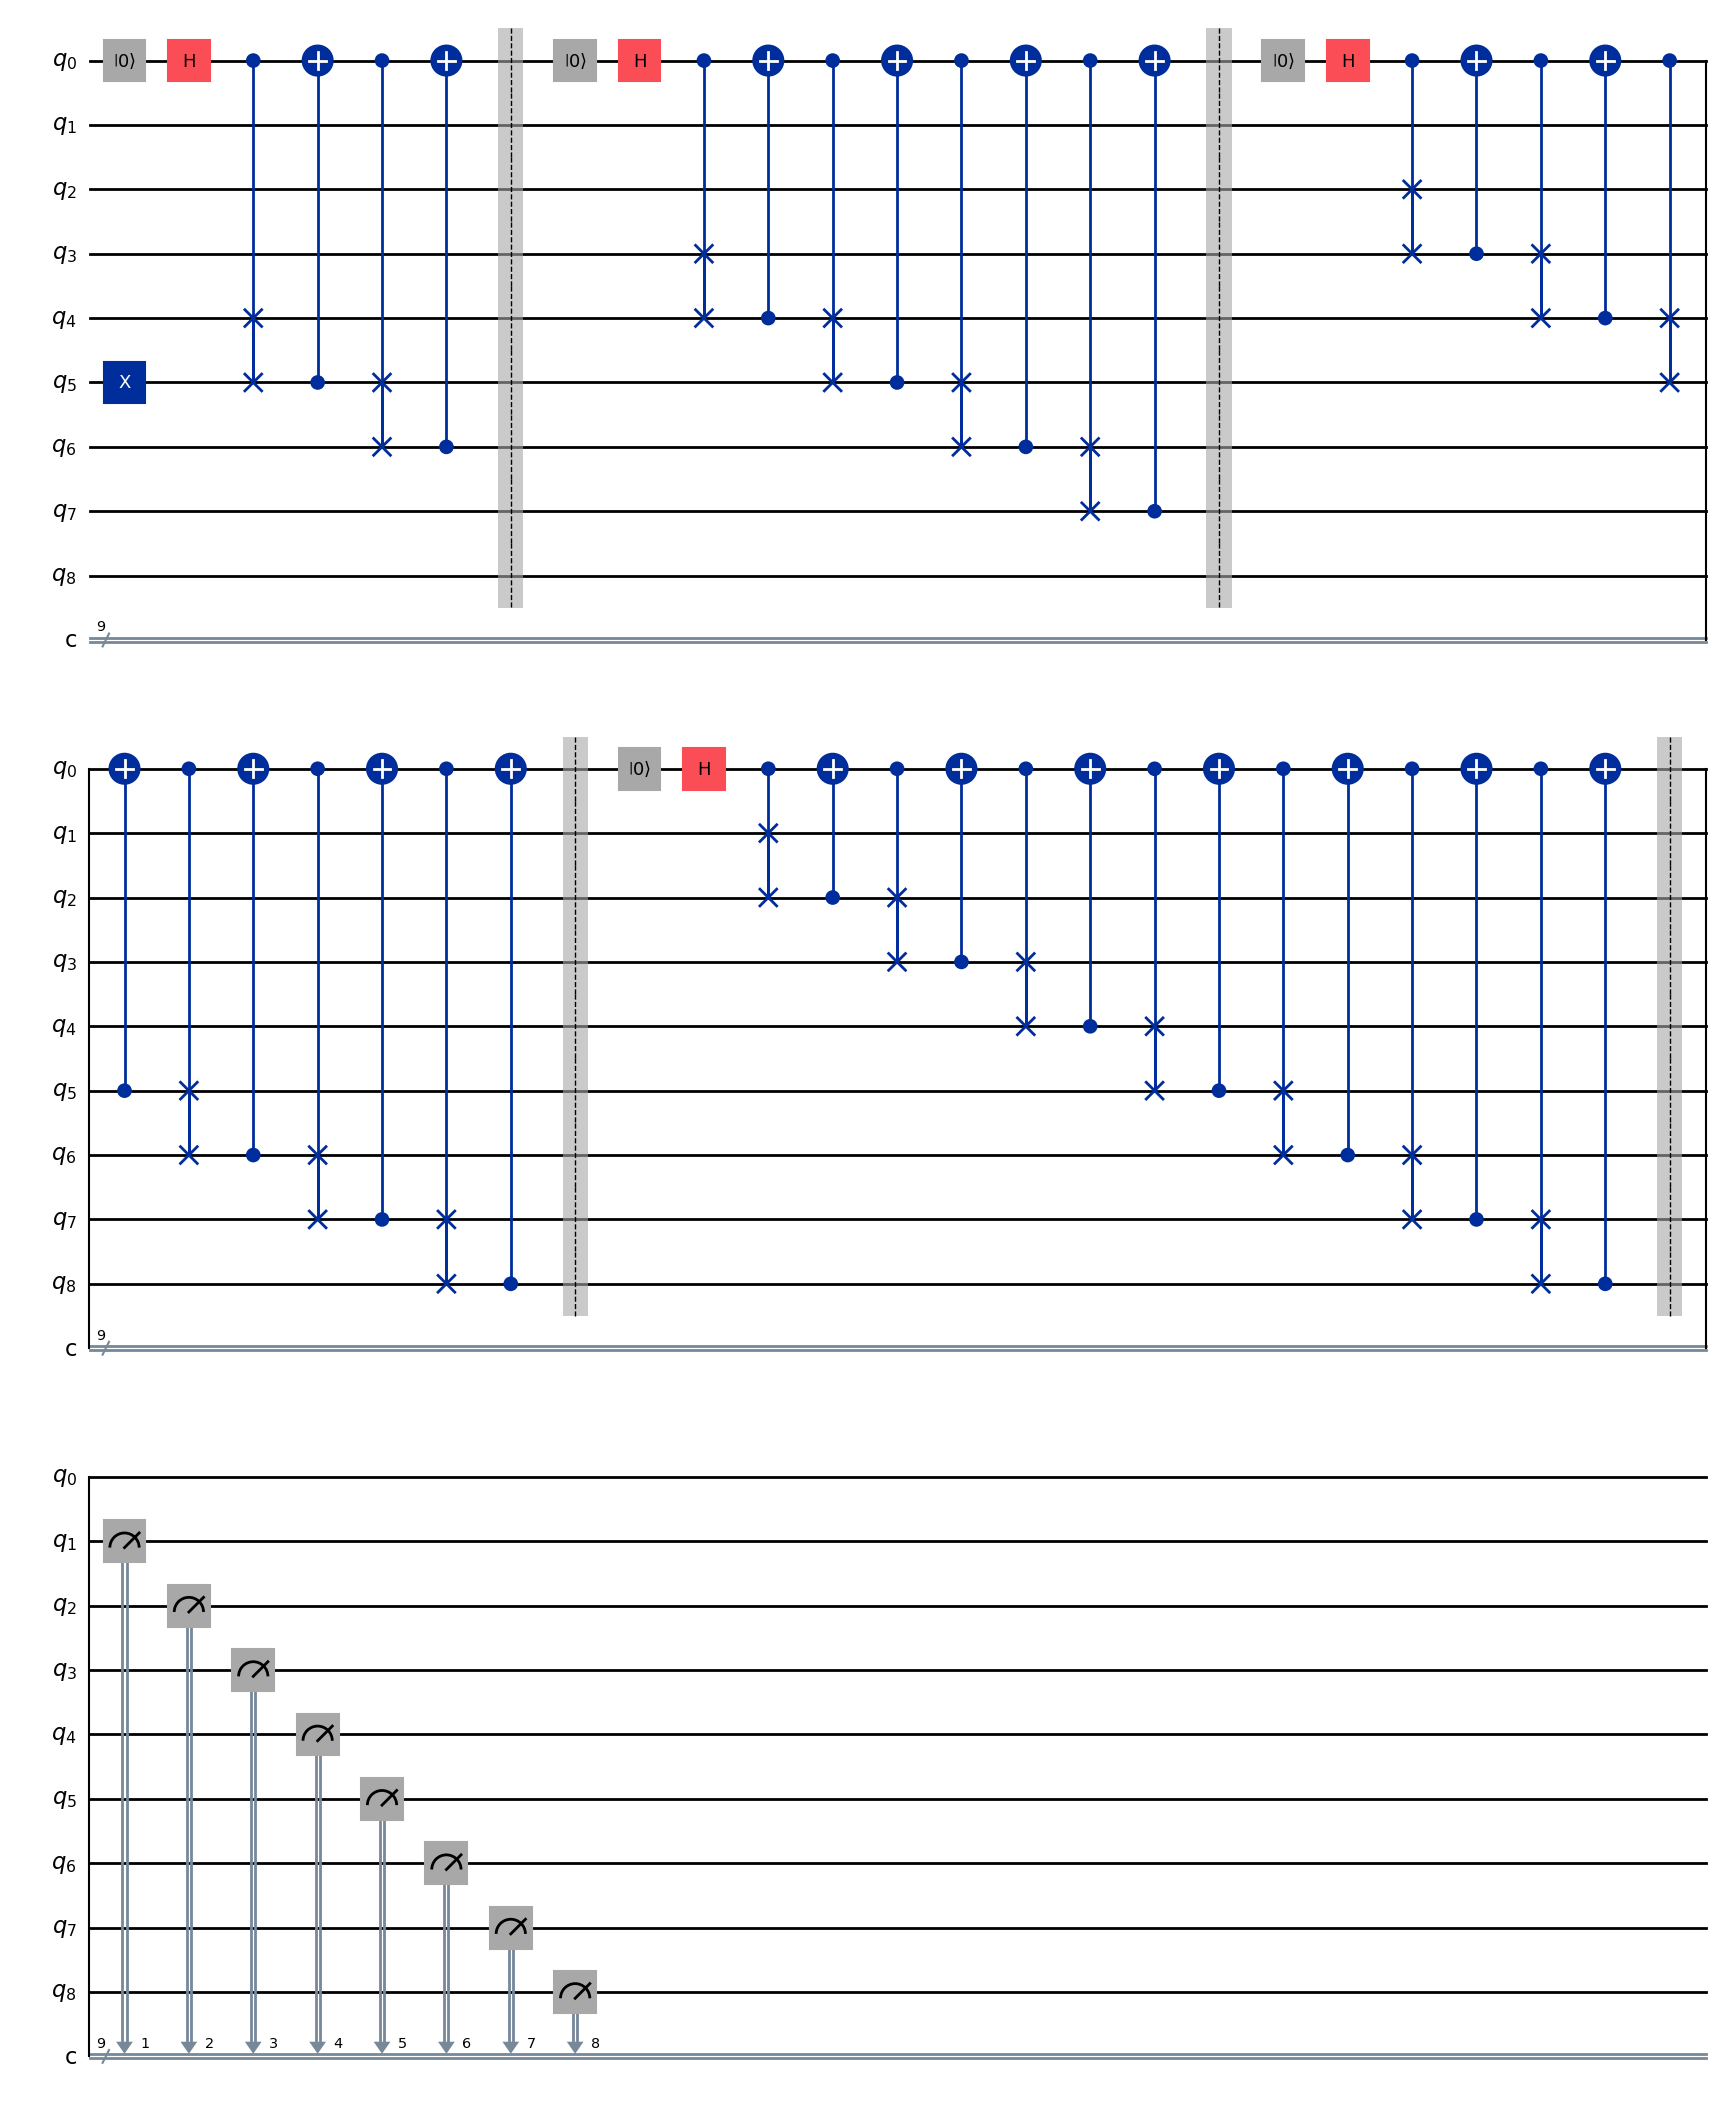

In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

def n_layer_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)

    for i in range(1, n + 1):
        qc.reset(coin)
        qc.h(coin)

        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc

qc = n_layer_qgb(4)
qc.draw('mpl')

counts: {'010000000': 245, '000000010': 69, '000001000': 261, '100000000': 59, '000100000': 390}


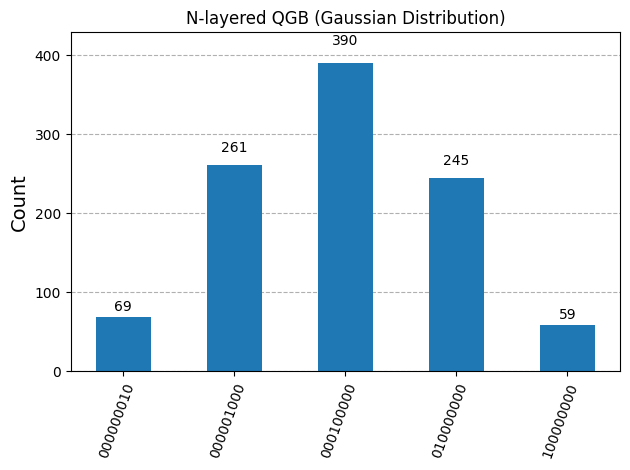

In [9]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()
print("counts:", counts)
plot_histogram(counts, title= "N-layered QGB (Gaussian Distribution)")


OpenQASM for a Biased 4-QGB

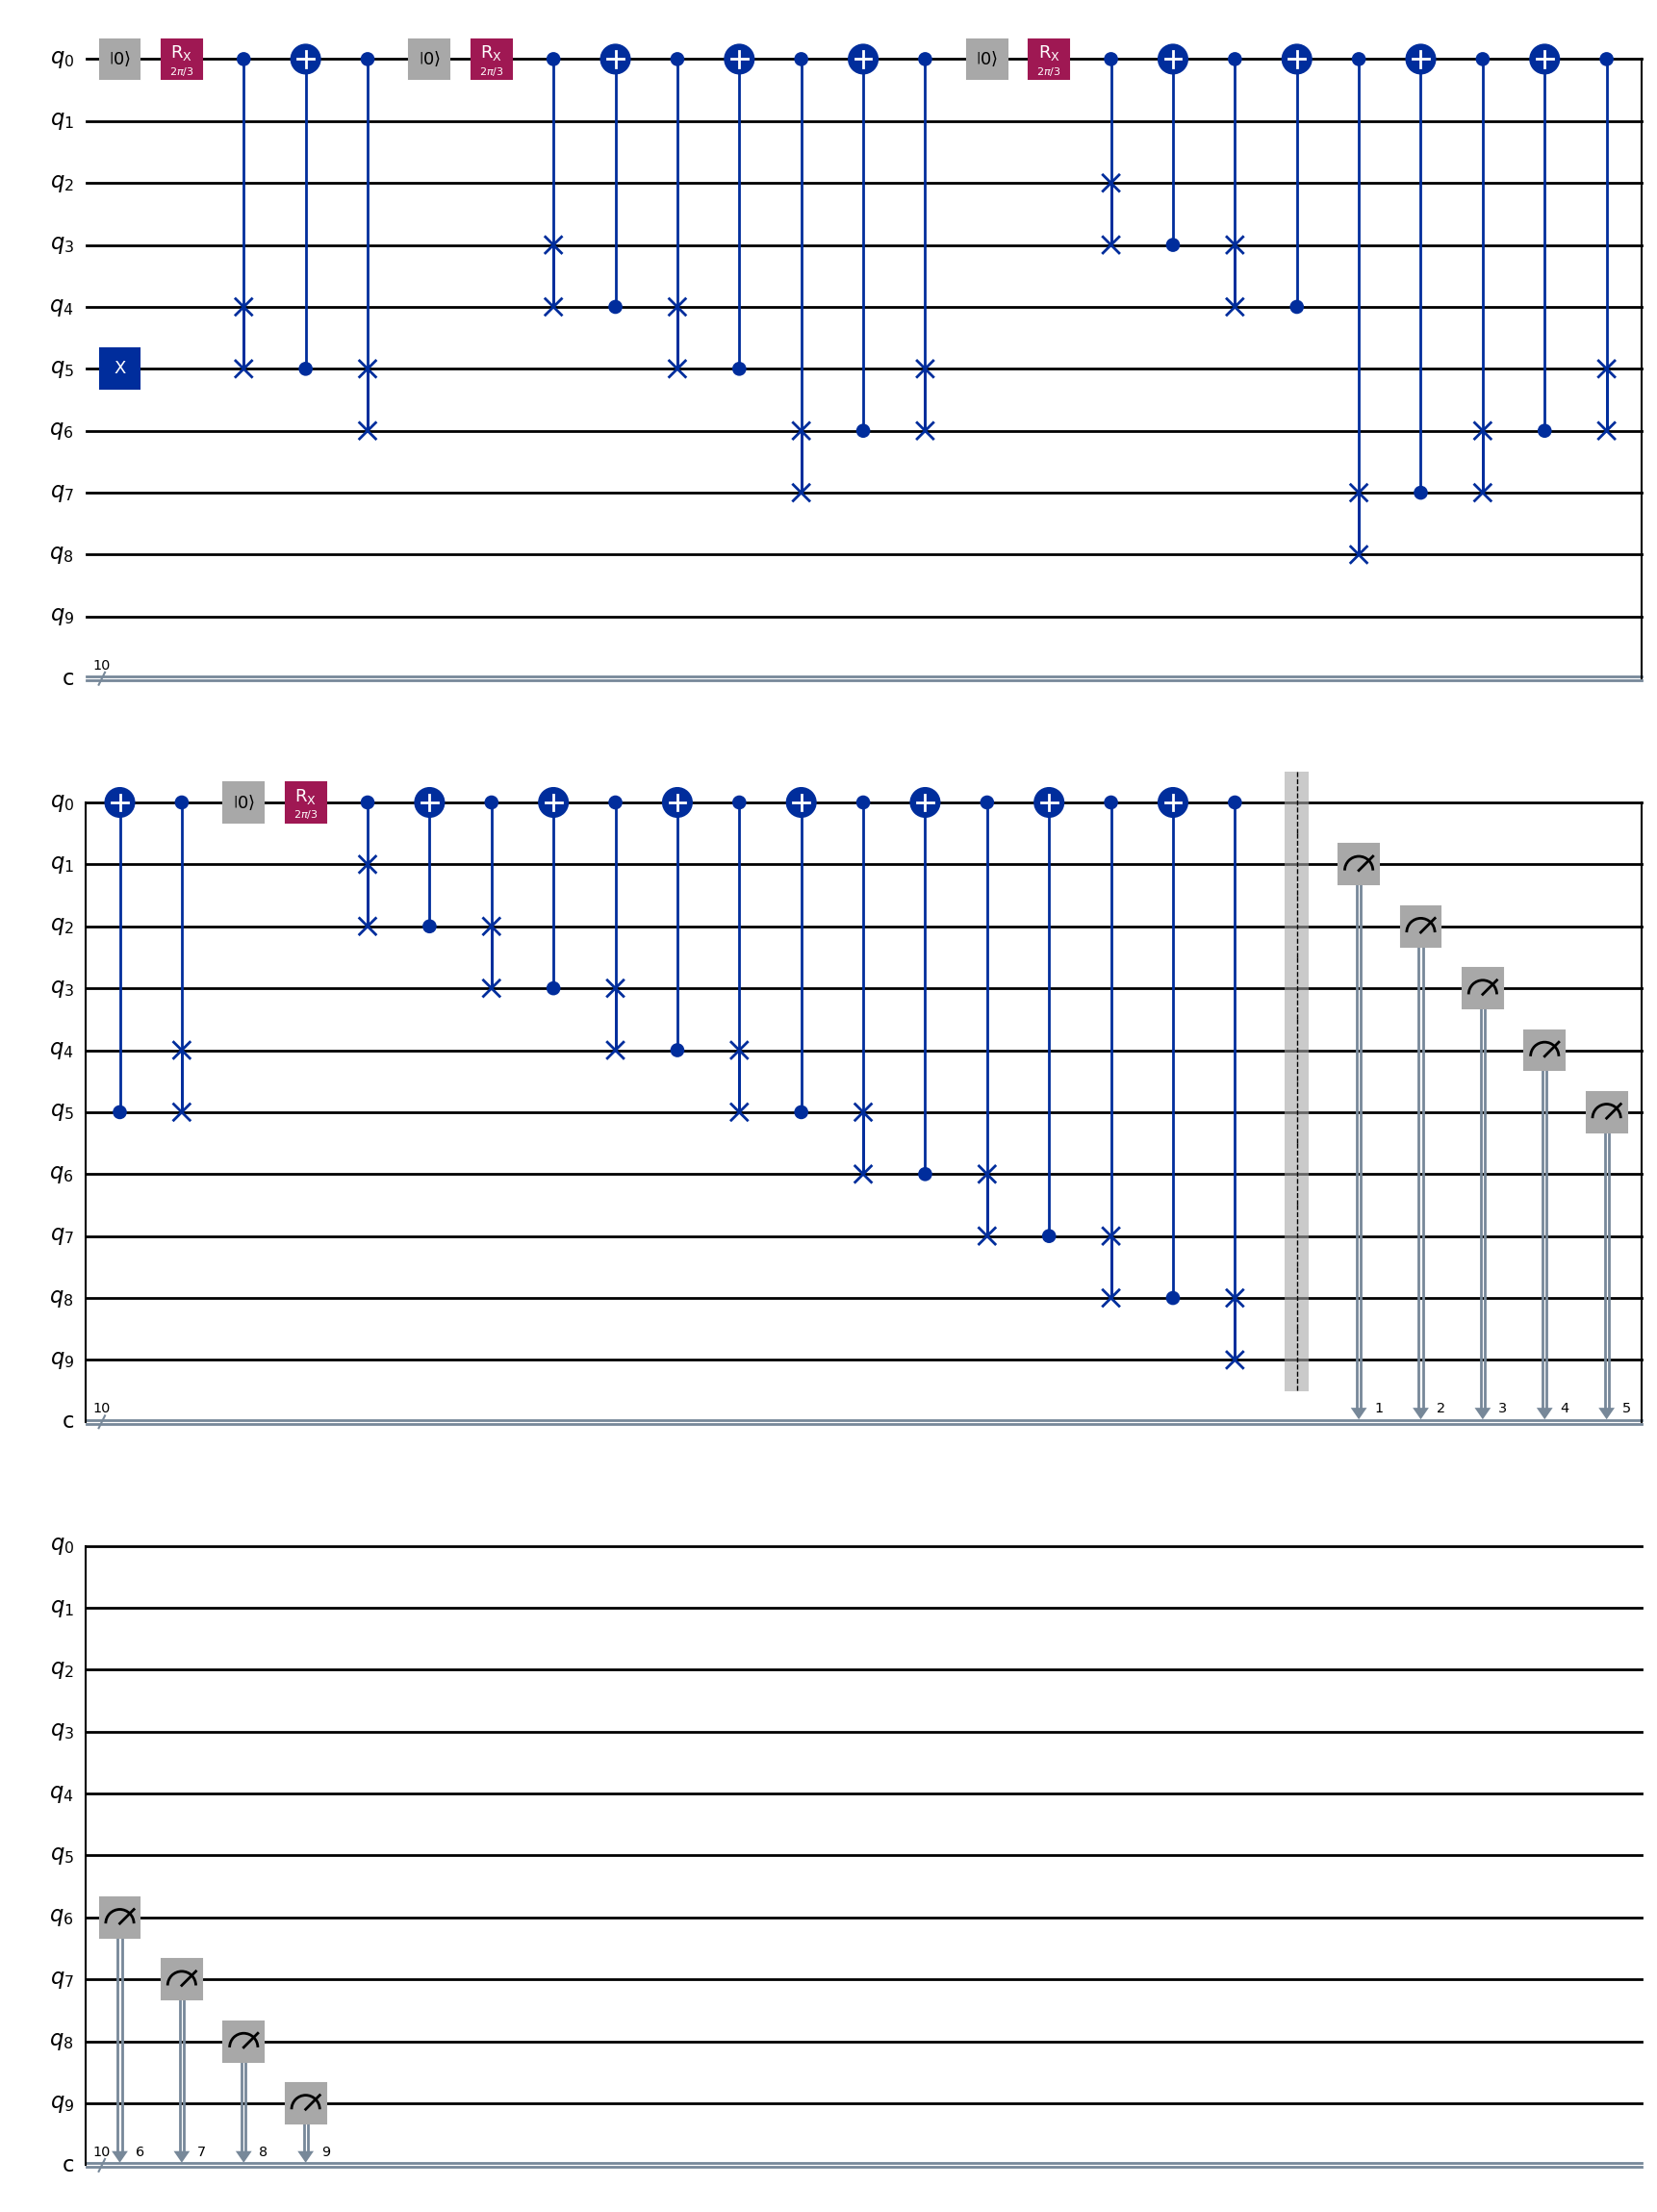

In [10]:
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
creg c[10];
reset q[0];
x q[5];
rx(2*pi/3) q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[6],q[7];
cx q[6],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[2],q[3];
cx q[3],q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[7],q[8];
cx q[7],q[0];
cswap q[0],q[6],q[7];
cx q[6],q[0];
cswap q[0],q[5],q[6];
cx q[5],q[0];
cswap q[0],q[4],q[5];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[1],q[2];
cx q[2],q[0];
cswap q[0],q[2],q[3];
cx q[3],q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
cx q[6],q[0];
cswap q[0],q[6],q[7];
cx q[7],q[0];
cswap q[0],q[7],q[8];
cx q[8],q[0];
cswap q[0],q[8],q[9];
barrier q;
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];
measure q[7] -> c[7];
measure q[8] -> c[8];
measure q[9] -> c[9];
"""

qc = QuantumCircuit.from_qasm_str(qasm_code)
qc.draw('mpl')

counts: {'0000100000': 246, '1000000000': 41, '0010000000': 148, '0000000010': 330, '0000001000': 259}


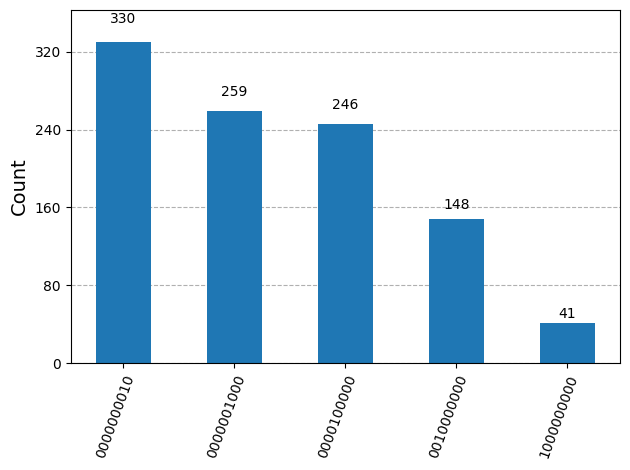

In [11]:
import matplotlib.pyplot as plt

backend = AerSimulator()
job = backend.run(qc)
result = job.result()
counts = result.get_counts()

print("counts:", counts)
# show histogram
plot_histogram(counts)

OpenQASM for Fine-Grained Biased QGB


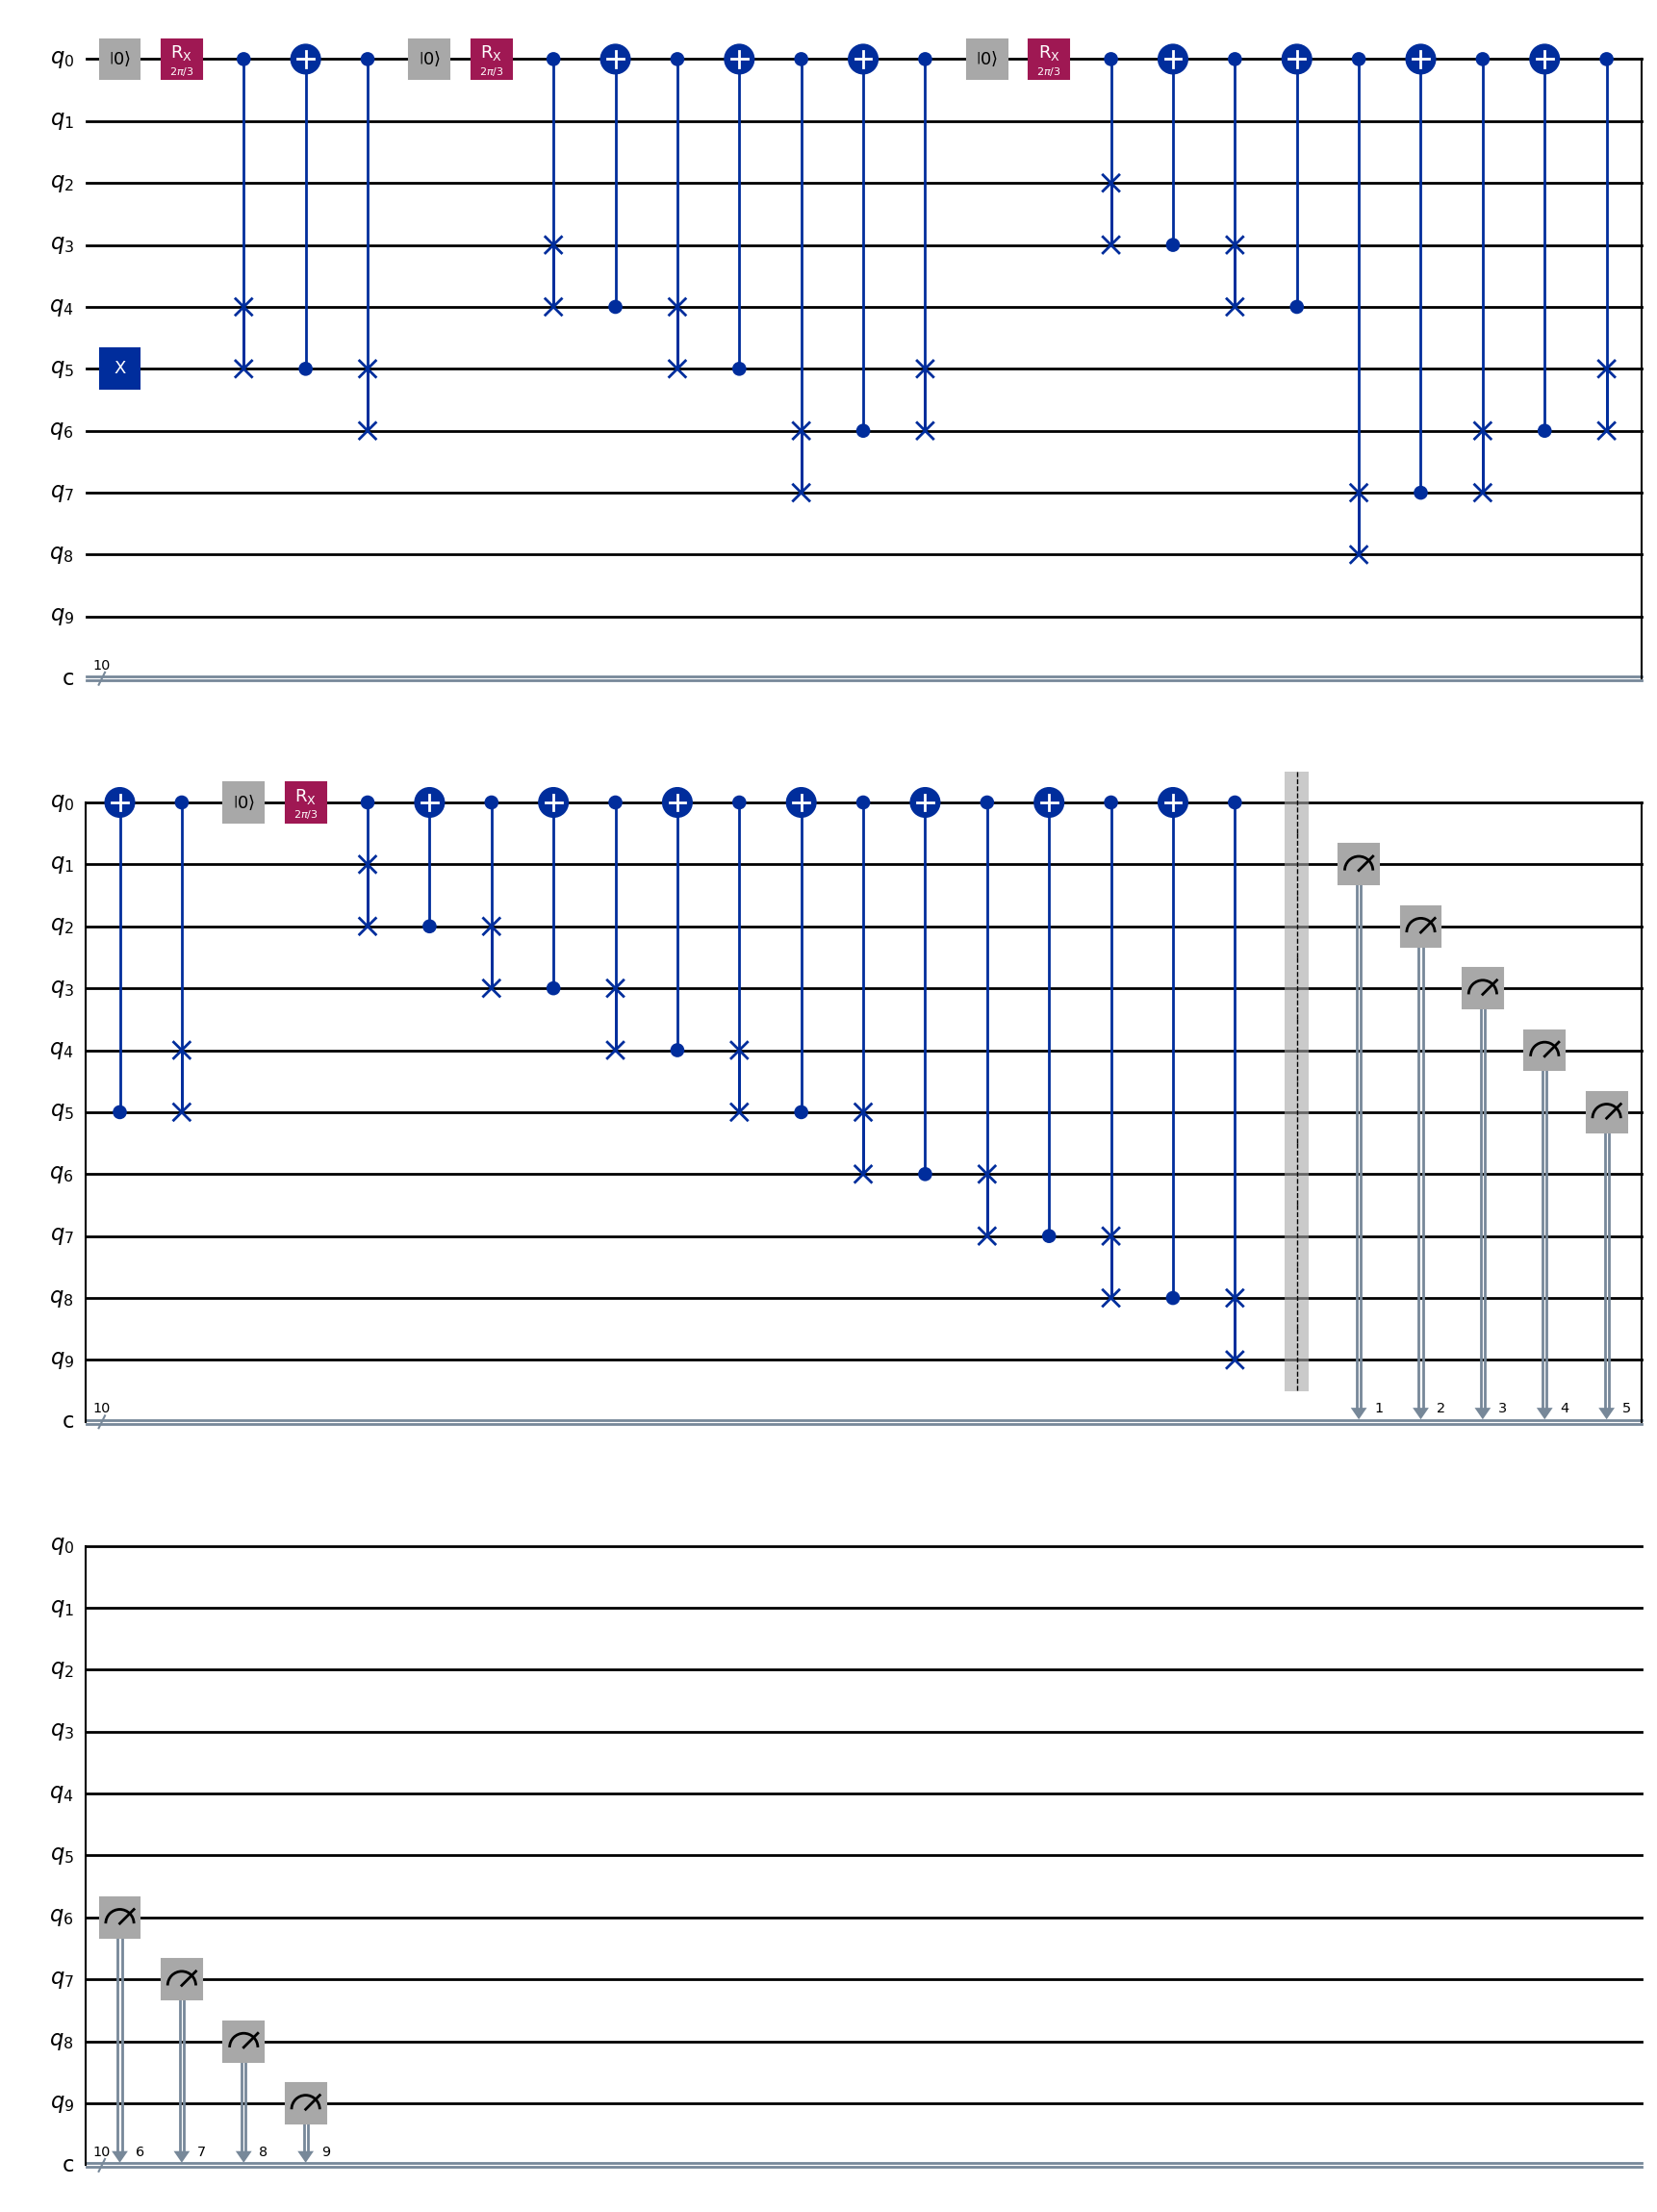

In [12]:
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
creg c[10];
reset q[0];
x q[5];
rx(2*pi/3) q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[5],q[6];
cx q[6],q[0];
cswap q[0],q[6],q[7];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
reset q[0];
cx q[6],q[5];
rx(2*pi/3) q[0];
reset q[6];
cswap q[0],q[2],q[3];
cx q[3],q[0];
cswap q[0],q[3],q[4];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[6],q[7];
cx q[7],q[0];
cswap q[0],q[7],q[8];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
reset q[0];
cx q[5],q[4];
cx q[7],q[6];
rx(2*pi/3) q[0];
reset q[5];
reset q[7];
cswap q[0],q[1],q[2];
cx q[2],q[0];
cswap q[0],q[2],q[3];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[5],q[6];
cx q[6],q[0];
cswap q[0],q[6],q[7];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[7],q[8];
cx q[8],q[0];
cswap q[0],q[8],q[9];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
cx q[4],q[3];
cx q[6],q[5];
cx q[8],q[7];
reset q[4];
reset q[6];
reset q[8];
barrier q;
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];
measure q[7] -> c[7];
measure q[8] -> c[8];
measure q[9] -> c[9];
"""
qcr = QuantumCircuit.from_qasm_str(qasm_code)
qc.draw('mpl')

counts: {'1000000000': 3, '0000100000': 199, '0000001000': 444, '0000000010': 332, '0010000000': 46}


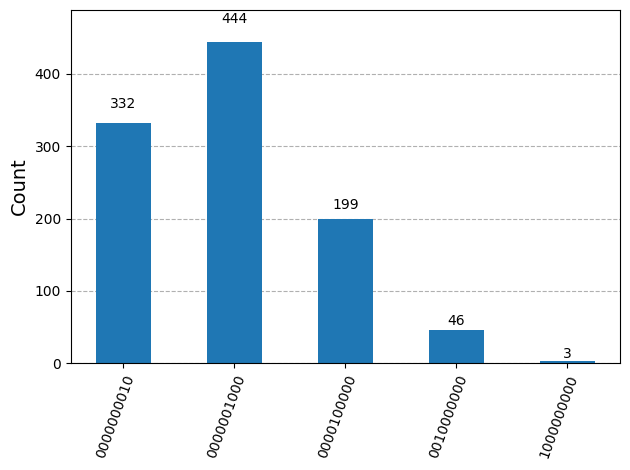

In [13]:
import matplotlib.pyplot as plt

backend = AerSimulator()
job = backend.run(qcr)
result = job.result()
counts = result.get_counts()

print("counts:", counts)
# show histogram
plot_histogram(counts)

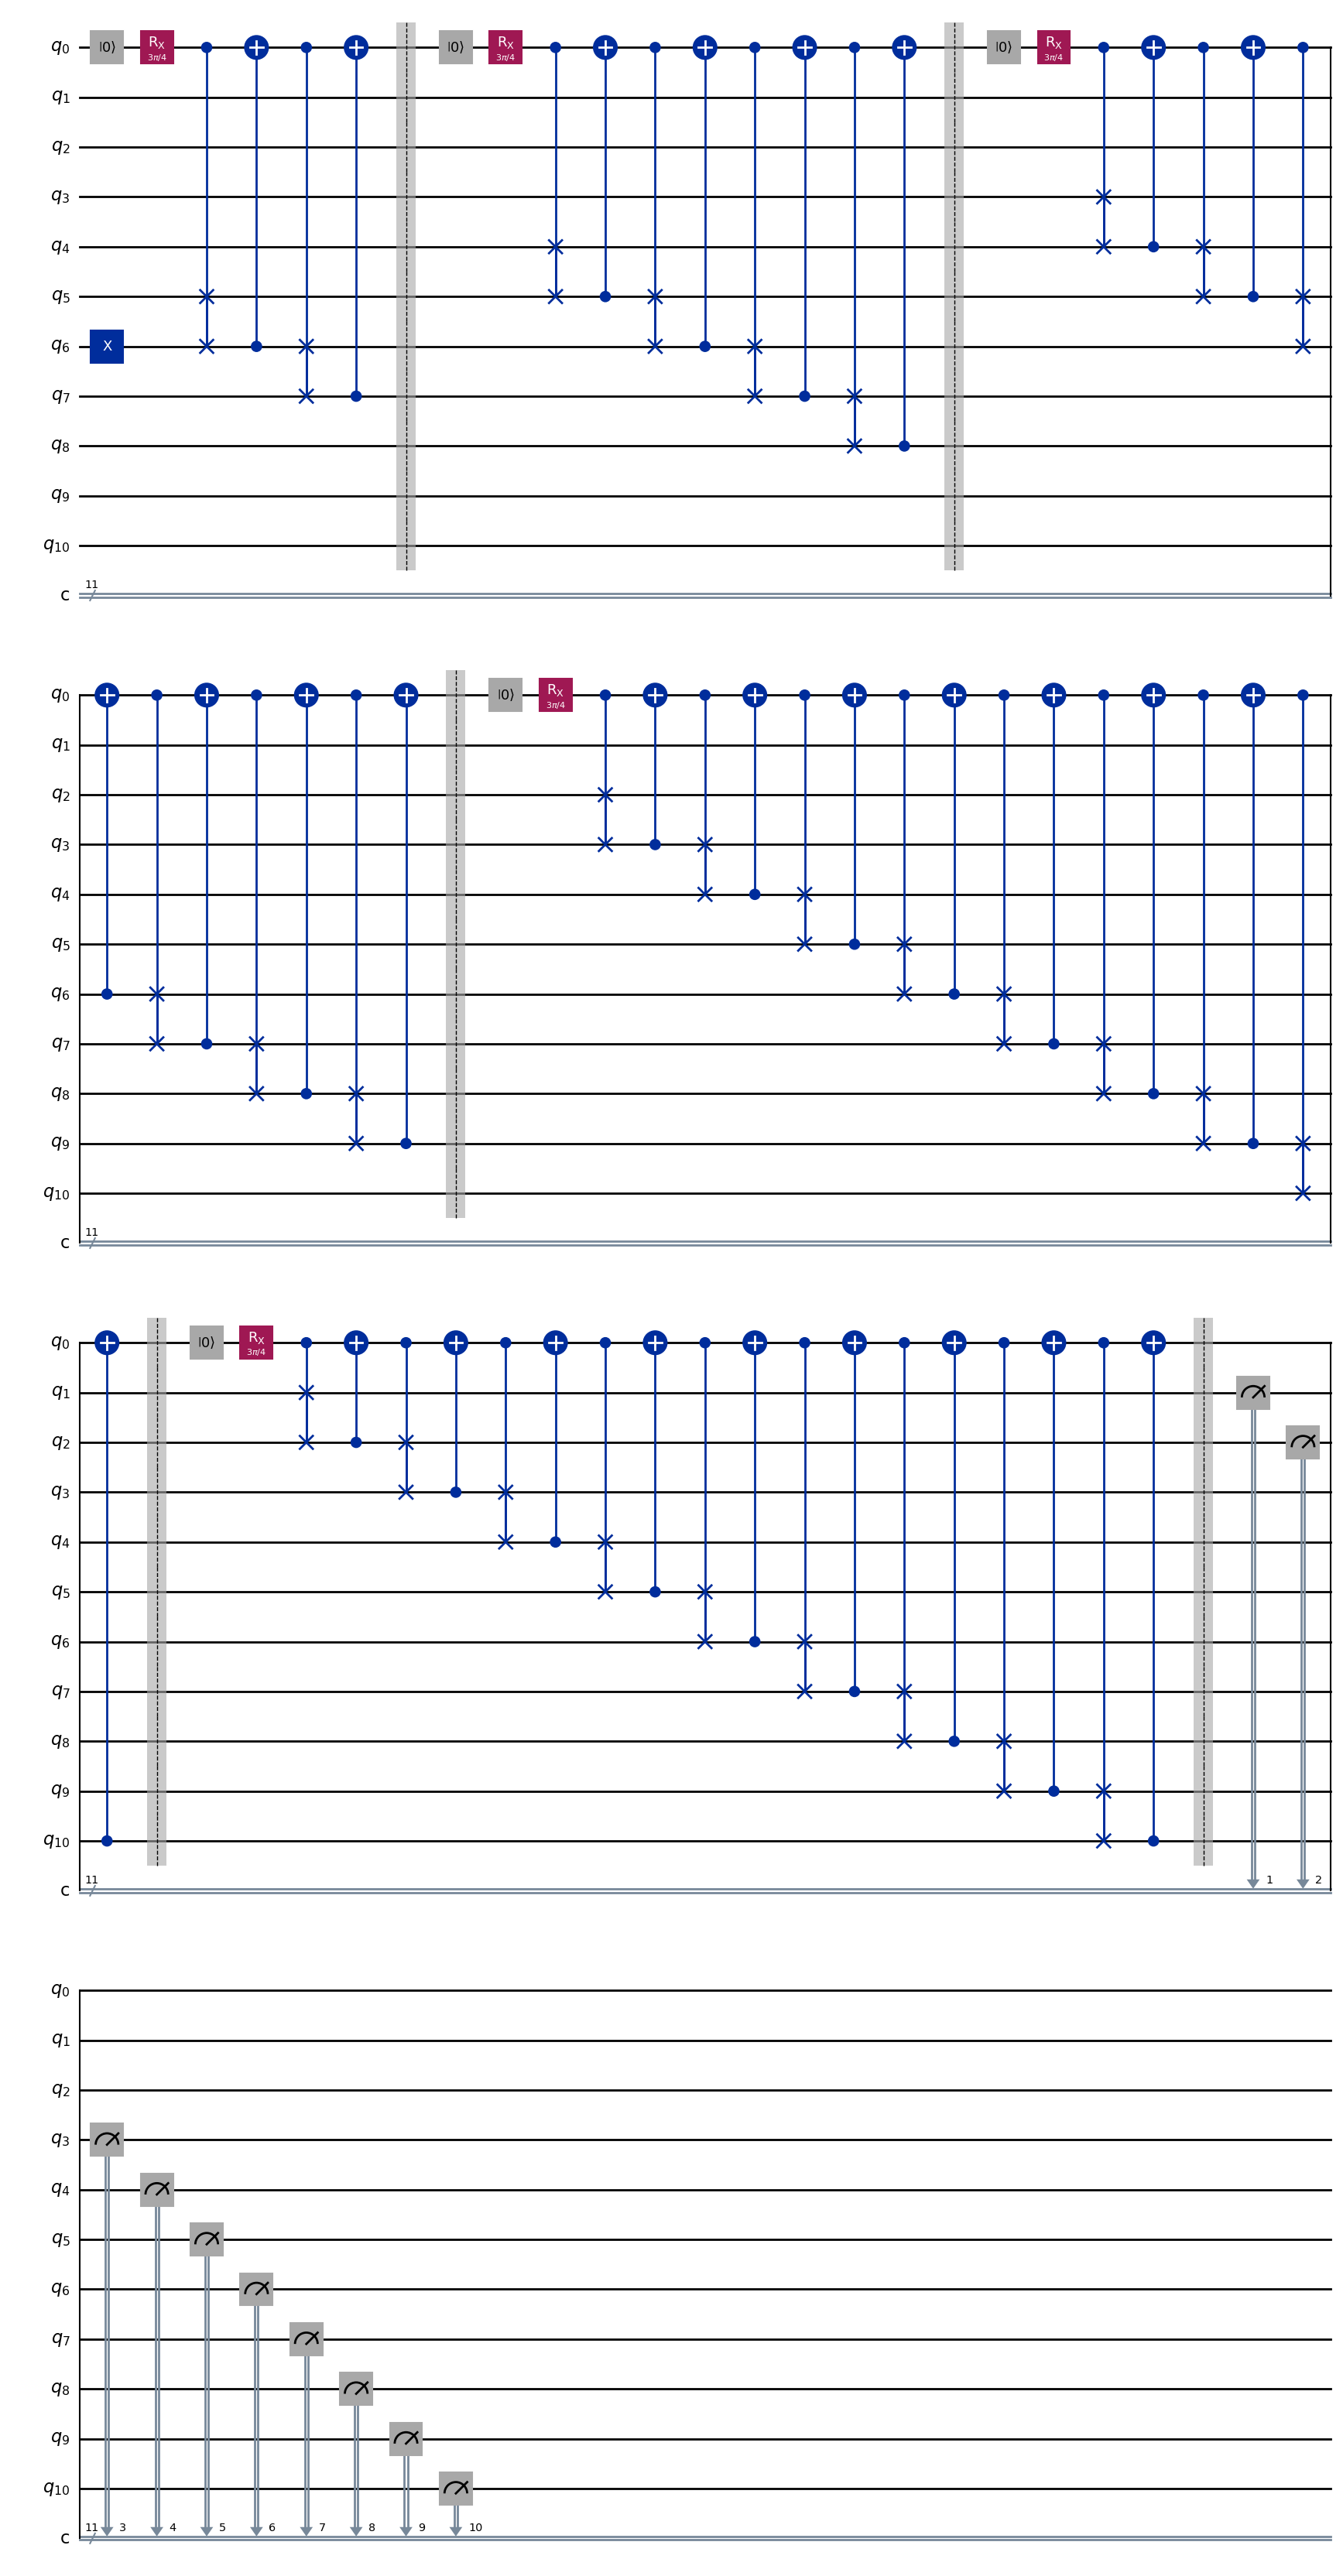

In [21]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi

def n_layer_fineg_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)

    for i in range(1, n + 1):
        qc.reset(coin)
        qc.rx(3*pi/4, coin)

        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc

qc = n_layer_fineg_qgb(5)
qc.draw('mpl')


counts: {'00000100000': 149, '00010000000': 20, '00000000010': 476, '00000001000': 379}


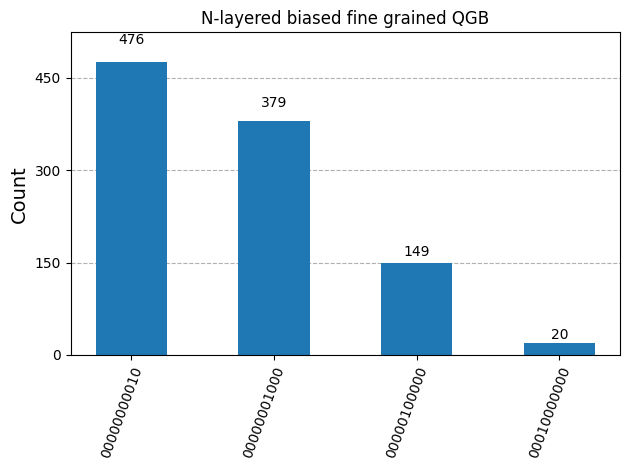

In [22]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()
print("counts:", counts)
# show histogram
plot_histogram(counts, title="N-layered biased fine grained QGB")

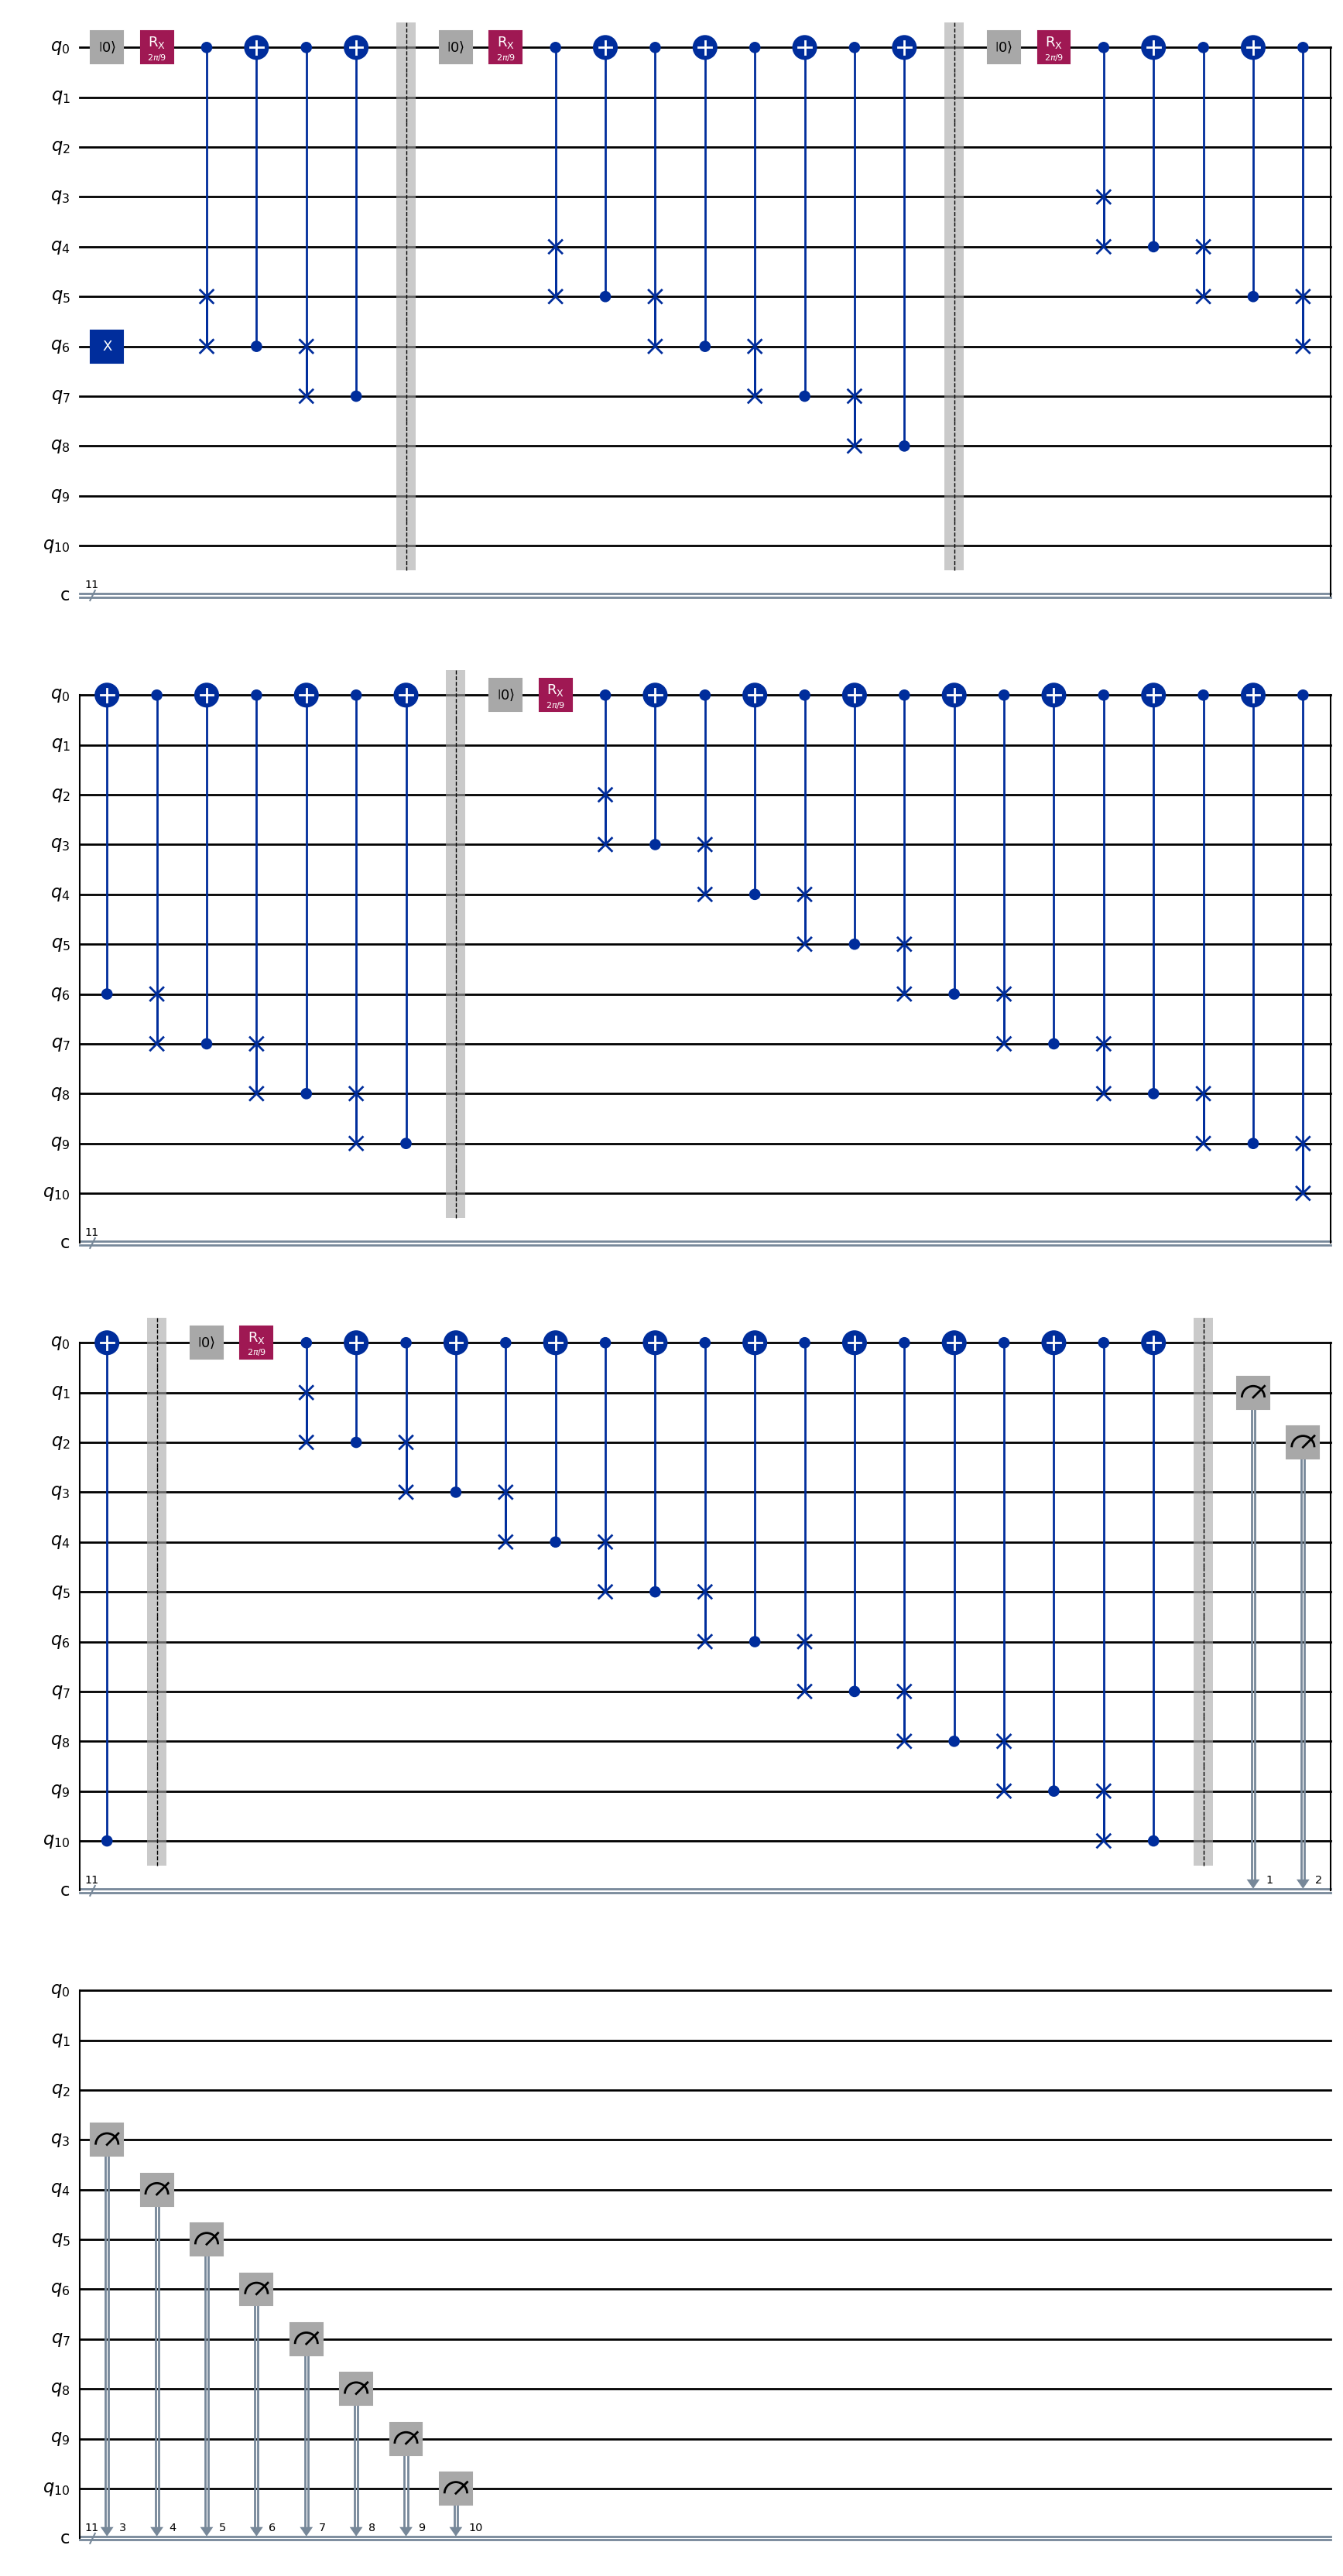

In [24]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi

def n_layer_finegrained_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)

    for i in range(1, n + 1):
        qc.reset(coin)
        qc.rx(2*pi/9, coin)

        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc

qc = n_layer_finegrained_qgb(5)
qc.draw('mpl')


In [17]:
# qc = n_layer_qgb(5)
# sim = AerSimulator(method='statevector')
# result = sim.run(qc, shots=200).result()
# from qiskit import transpile
# qc_opt = transpile(qc, optimization_level=3)
# counts = result.get_counts(qc_opt)
# plot_histogram(counts)

# Hadamard Distribution

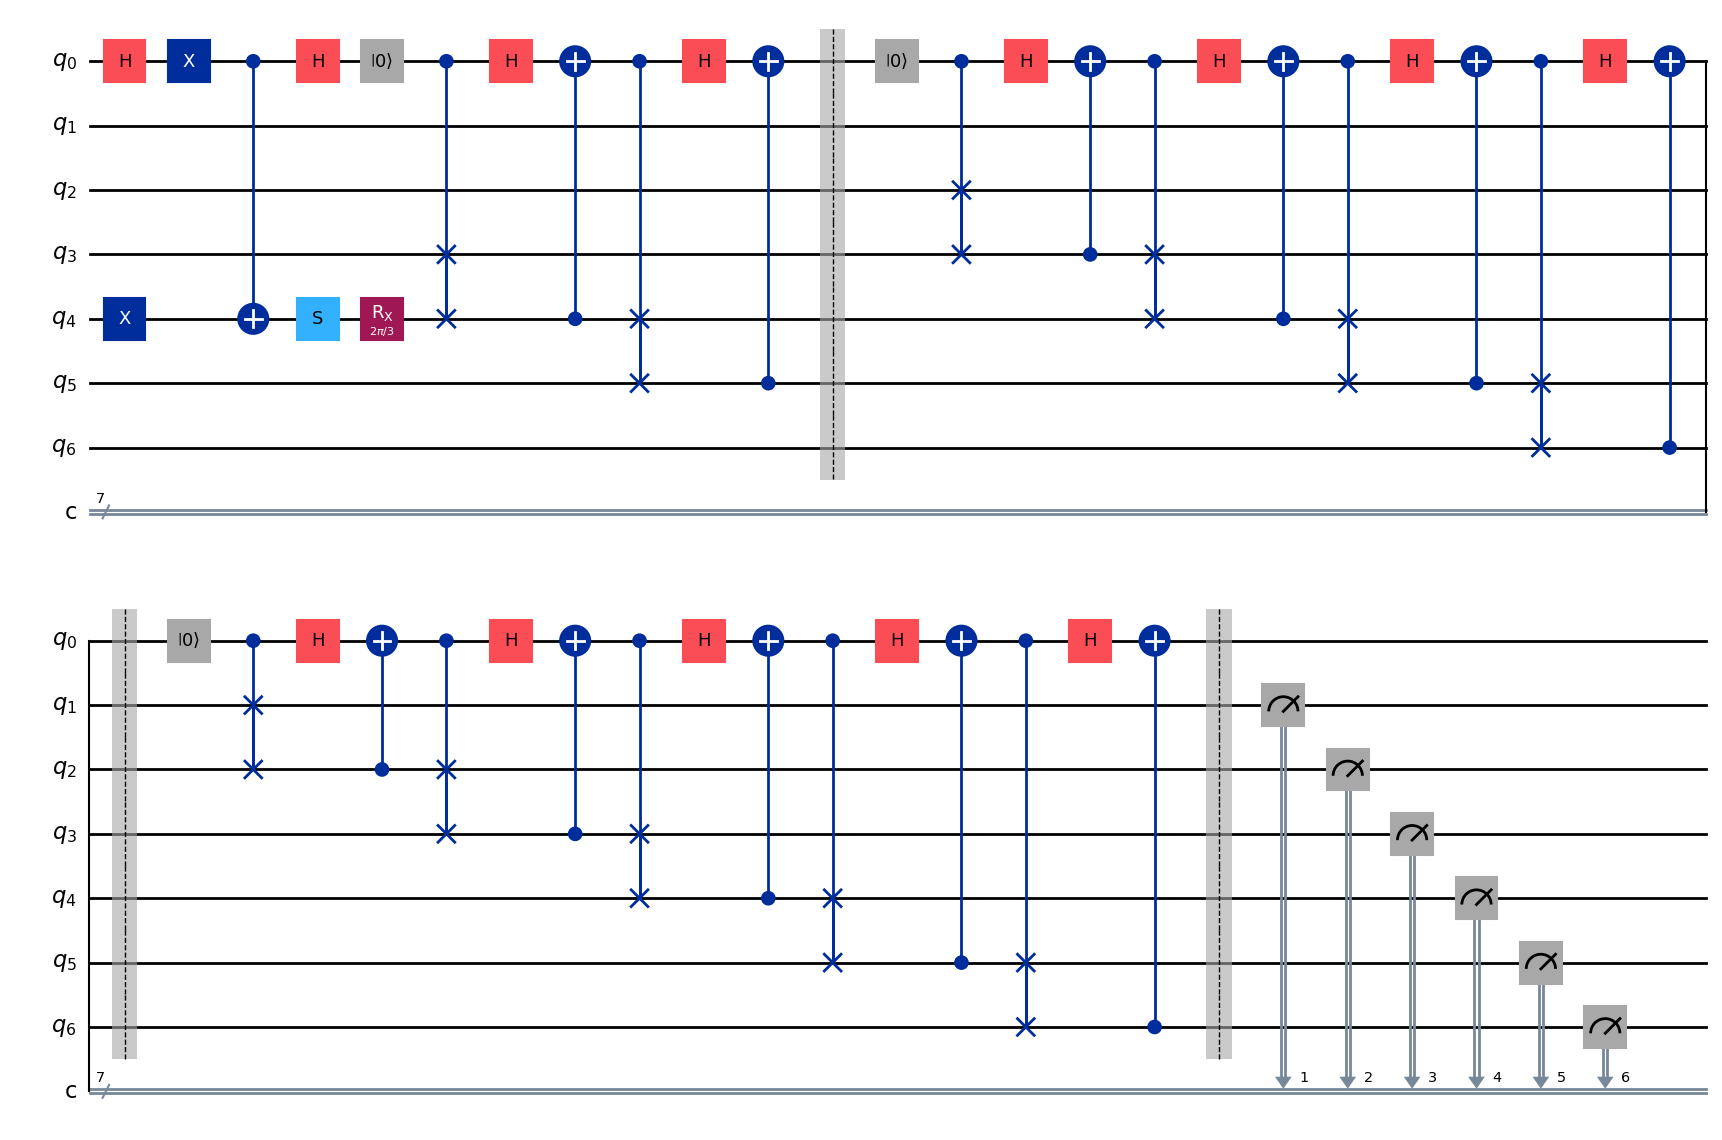

In [25]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi

def n_layer_hadamard_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)
    qc.h(coin)
    qc.x(coin)
    qc.cx(coin, center)
    qc.h(coin)
    qc.s(center)
    qc.rx(2*pi/3, center)
    # qc.s(center)



    for i in range(1, n + 1):
        qc.reset(coin)
        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.h(coin)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc

qc = n_layer_hadamard_qgb(3)
qc.draw('mpl')

counts: {'0001000': 43, '0100000': 144, '0000100': 85, '0010000': 148, '1000000': 306, '0000000': 774}


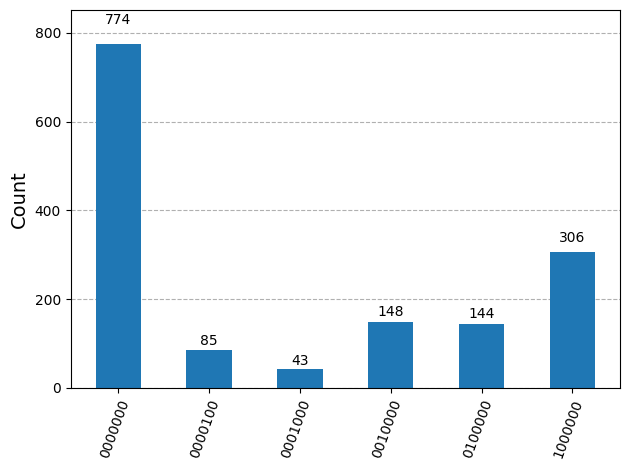

In [26]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result = sim.run(qc, shots=1500).result()
counts = result.get_counts()
print("counts:", counts)
plot_histogram(counts)

# Let's use the noise model

In [27]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi

def n_layer_fineg_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    # Initialize with total_qubits qubits and total_qubits - 1 classical bits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)

    for i in range(1, n + 1):
        qc.reset(coin)
        qc.rx(3*pi/4, coin)


        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits (1 to total_qubits - 1) into classical bits (0 to total_qubits - 2)
    for i in range(1, total_qubits):
        qc.measure(i, i - 1) # Map qubit i to classical bit i-1

    return qc

qc = n_layer_fineg_qgb(4) # Changed n from 3 to 2
# noise_model = NoiseModel()
# qc.draw('mpl')

counts: {'010000000': 1, '001000000': 21, '000010000': 134, '000000100': 561, '000000001': 783}


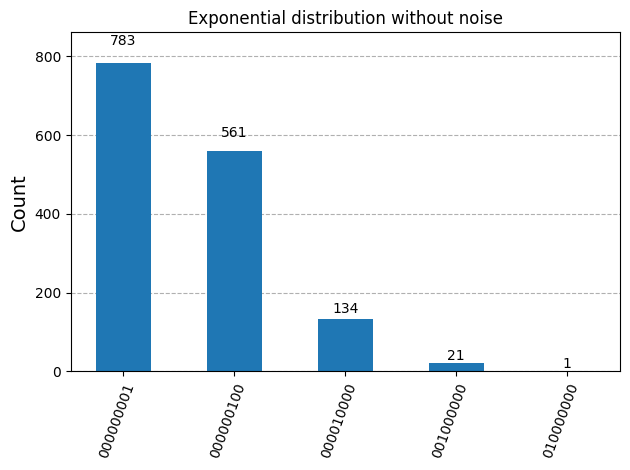

In [28]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result_1 = sim.run(qc, shots=1500).result()
counts = result_1.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Exponential distribution without noise")

counts: {'000010100': 2, '010010000': 1, '000100001': 2, '000110000': 1, '010000100': 7, '010011000': 1, '001000001': 9, '000000100': 342, '000010000': 87, '000010010': 1, '000000001': 515, '000101001': 1, '000001100': 2, '000000011': 3, '001000000': 16, '000000000': 5, '010000001': 5, '001100000': 1, '000100100': 7, '000000101': 4, '000001001': 4, '000010001': 3, '010000000': 1, '001000100': 2, '000000110': 2}


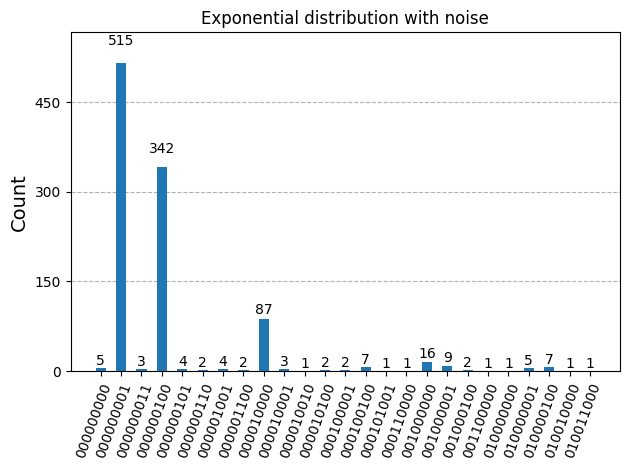

In [30]:
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

backend = FakeAlgiers()
noise_model = NoiseModel.from_backend(backend)
# # Transpile circuit for noisy basis gates
# passmanager = generate_preset_pass_manager(
#     optimization_level=3, backend=backend
# )
# circ_tnoise = passmanager.run(qc)

simulator = AerSimulator(noise_model=noise_model)
# Now this will simulate noise from FakeAlgiers
result_2 = simulator.run(qc).result()
counts = result_2.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Exponential distribution with noise")

#Now N-layered QGB (Gaussian Distribution)

In [37]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

def n_layer_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)

    for i in range(1, n + 1):
        qc.reset(coin)
        qc.h(coin)

        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc
qc = n_layer_qgb(5)
# qc.draw('mpl')

counts: {'00000000010': 31, '10000000000': 26, '00000100000': 316, '01000000000': 154, '00000001000': 176, '00010000000': 297}


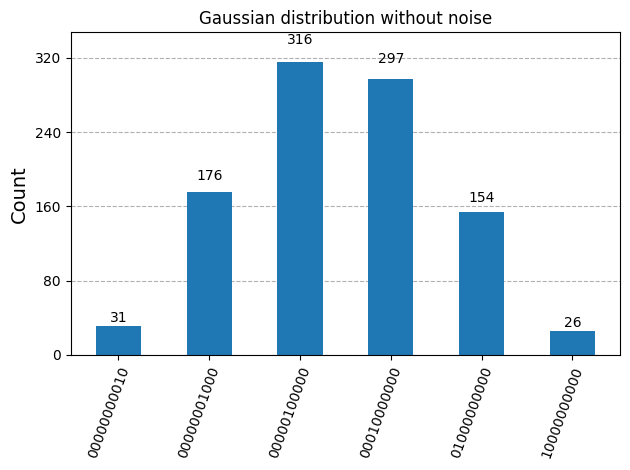

In [38]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result_3 = sim.run(qc, shots=1000).result()
counts = result_3.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Gaussian distribution without noise")

counts: {'00110000000': 1, '11001000010': 1, '00000000110': 1, '00000001010': 1, '01100100000': 1, '01000000100': 2, '01000000000': 143, '00000000010': 28, '10010000000': 13, '00000101000': 3, '00010000000': 291, '00000011000': 1, '01000100000': 1, '10000100000': 10, '11001000000': 1, '11000000000': 9, '00000001000': 152, '10000000000': 31, '00010010000': 1, '00000000000': 8, '00000100000': 288, '00010000100': 2, '00100100000': 1, '00010001000': 3, '00100001000': 4, '00011000000': 2, '11100000000': 1, '00010110000': 1, '10000001000': 5, '01000010000': 1, '00001100000': 4, '00000100010': 5, '00000100100': 1, '00010100000': 5, '00010000010': 1, '01010000000': 1}


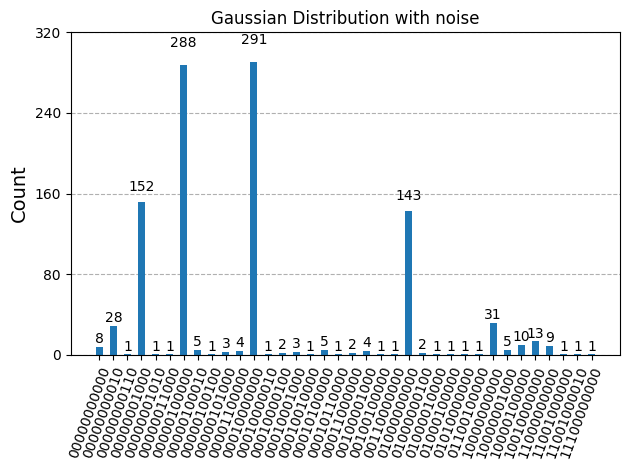

In [39]:
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit import transpile

from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

backend = FakeAlgiers()
noise_model = NoiseModel.from_backend(backend)
# qc_transpileg = transpile(qc, backend=backend, optimization_level=3) # Added qc here
# # Transpile circuit for noisy basis gates
# passmanager = generate_preset_pass_manager(
#     optimization_level=3, backend=backend
# )
# circ_tnoise = passmanager.run(qc)

simulator = AerSimulator(noise_model=noise_model)
# Now this will simulate noise from FakeAlgiers
result_4 = simulator.run(qc).result()
counts = result_4.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Gaussian Distribution with noise")

In [40]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi

def n_layer_hadamard_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    qc = QuantumCircuit(total_qubits, total_qubits)

    coin = 0
    center = n + 1
    qc.x(center)
    qc.h(coin)
    qc.x(coin)
    qc.cx(coin, center)
    qc.h(coin)
    qc.s(center)
    qc.rx(2*pi/5, center)
    # qc.s(center)



    for i in range(1, n + 1):
        qc.reset(coin)
        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):
            if j + 1 < total_qubits:
                qc.cswap(coin, j, j + 1)
                qc.h(coin)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits only (exclude coin)
    for i in range(1, total_qubits):
        qc.measure(i, i)

    return qc

qc = n_layer_hadamard_qgb(3)
# qc.draw('mpl')

counts: {'0000100': 93, '0010000': 143, '0100000': 135, '0001000': 50, '1000000': 312, '0000000': 767}


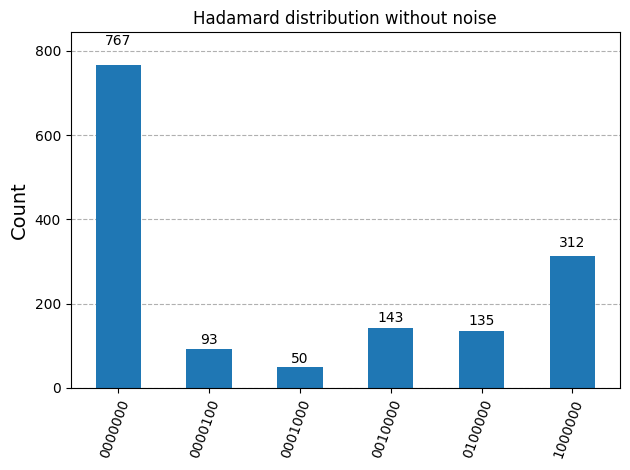

In [41]:
from qiskit_aer import AerSimulator
sim = AerSimulator()
result_5 = sim.run(qc, shots=1500).result()
counts = result_5.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Hadamard distribution without noise")

counts: {'1011100': 1, '1111000': 3, '1010100': 6, '1101010': 1, '1010010': 3, '1111100': 1, '1000010': 6, '1001100': 5, '0011100': 2, '1110100': 2, '0011000': 14, '1000100': 19, '1001010': 2, '0010010': 6, '1010000': 27, '0010100': 21, '0101010': 1, '0101100': 2, '0000110': 10, '0010110': 4, '1100000': 39, '1100110': 3, '0111000': 4, '1110110': 1, '1101100': 1, '0100000': 85, '0110000': 27, '1001000': 13, '0110110': 1, '0000010': 21, '1101000': 8, '1110000': 10, '1100010': 2, '0110010': 5, '0011110': 1, '0100010': 7, '1010110': 1, '1000000': 133, '0000000': 292, '0100110': 4, '0010000': 71, '0001010': 4, '0101110': 1, '0001110': 2, '0011010': 2, '0100100': 16, '0110100': 5, '1011000': 9, '1100100': 5, '0000100': 52, '0101000': 10, '0001000': 41, '0001100': 9, '1000110': 3}


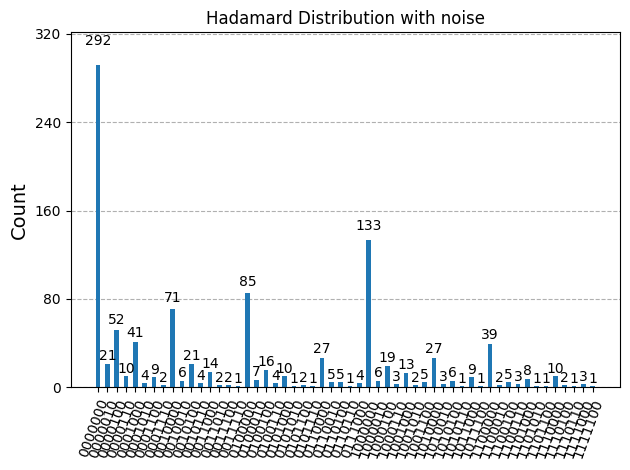

In [42]:
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit import transpile

backend = FakeAlgiers()
qc_transpiled = transpile(qc, backend, optimization_level=3)
noise_model = NoiseModel.from_backend(backend)


simulator = AerSimulator(noise_model=noise_model)
# Now this will simulate noise from FakeAlgiers
result_6 = simulator.run(qc_transpiled).result()
counts = result_6.get_counts()
print("counts:", counts)
plot_histogram(counts, title="Hadamard Distribution with noise")

## Compute the distances between the obtained distributions and the target distributions, accounting for stochastic uncertainty.

In [43]:
from qiskit.quantum_info.analysis import hellinger_fidelity

hellinger_fidelity(result_6.get_counts(), result_5.get_counts()) # here checking fidelty of normal H distribution and noisy hadamard distribution
# without optimizaton i have compared

0.6505935953144584


After Optimize1qGates:
{'100000': 228, '010000': 76, '000100': 32, '001000': 102, '000000': 525, '000010': 61}


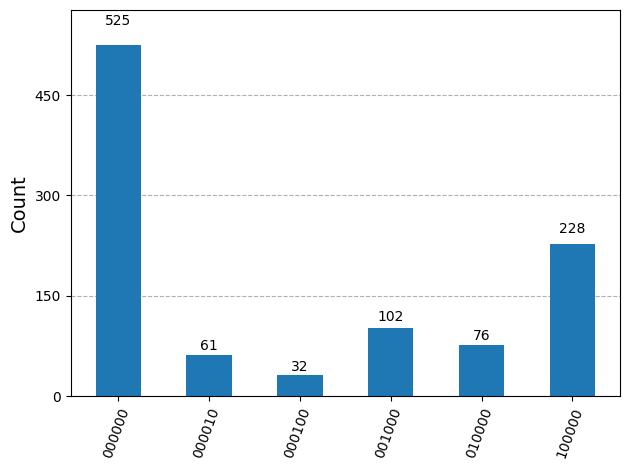

In [44]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from math import pi
from qiskit_aer import AerSimulator # Import AerSimulator

def n_layer_hadamard_qgb(n):
    total_qubits = 2 * n + 1   # 1 coin + (2n+1) position qubits
    # Initialize with total_qubits qubits and total_qubits - 1 classical bits
    qc = QuantumCircuit(total_qubits, total_qubits - 1)

    coin = 0
    center = n + 1
    qc.x(center)
    qc.h(coin)
    qc.x(coin)
    qc.cx(coin, center)
    qc.h(coin)
    qc.s(center)
    qc.rx(3*pi/4, center)
    qc.s(center)



    for i in range(1, n + 1):
        qc.reset(coin)
        start = center - i
        end = center + i - 1  # i+1 must exist, so go only to end - 1

        for j in range(start, end + 1):  # inclusive loop
            if j + 1 < total_qubits:    # safe indexing
                qc.cswap(coin, j, j + 1)
                qc.h(coin)
                qc.cx(j + 1, coin)

        qc.barrier()

    # Measure position qubits (1 to total_qubits - 1) into classical bits (0 to total_qubits - 2)
    for i in range(1, total_qubits):
        qc.measure(i, i - 1) # Map qubit i to classical bit i-1

    return qc

qc = n_layer_hadamard_qgb(3)
# qc.draw('mpl')
simulator = AerSimulator()
pm3 = generate_preset_pass_manager(optimization_level=3)

# Apply each optimization
qc_pm3 = pm3.run(qc)

print("\nAfter Optimize1qGates:")
# print(qc_pm1)
# qc_pm1.draw("mpl")
# qc_transpiled = transpile(translated, backend, optimization_level=3)

# lets simulate on the aer simulator
simulator = AerSimulator()
result_n = simulator.run(qc_pm3)
hadamard_noiseless_counts = result_n.result().get_counts()
print(hadamard_noiseless_counts)

#  lets plot the histogram
plot_histogram(hadamard_noiseless_counts)


After Optimize1qGates:

After Level 3 Preset Pass Manager:
     ┌─────────┐           ┌───┐              ┌───┐┌───┐   ┌───┐┌───┐ ░      »
q_0: ┤ U2(0,0) ├──■────────┤ H ├───────|0>──■─┤ H ├┤ X ├─■─┤ H ├┤ X ├─░──|0>─»
     └─────────┘  │        └───┘            │ └───┘└─┬─┘ │ └───┘└─┬─┘ ░      »
q_1: ─────────────┼─────────────────────────┼────────┼───┼────────┼───░──────»
                  │                         │        │   │        │   ░      »
q_2: ─────────────┼─────────────────────────┼────────┼───┼────────┼───░──────»
                  │                         │        │   │        │   ░      »
q_3: ─────────────┼─────────────────────────X────────┼───┼────────┼───░──────»
        ┌───┐   ┌─┴─┐┌───────────────┐      │        │   │        │   ░      »
q_4: ───┤ X ├───┤ X ├┤ U3(3π/4,0,-π) ├──────X────────■───X────────┼───░──────»
        └───┘   └───┘└───────────────┘                   │        │   ░      »
q_5: ────────────────────────────────────────────────────X────────■───░

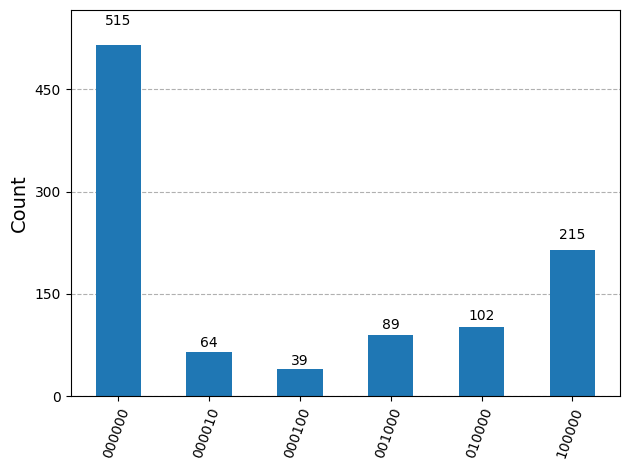

In [45]:
from qiskit_aer.noise import NoiseModel
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit import transpile

backend = FakeAlgiers()

noise_model = NoiseModel.from_backend(backend)

# transpiled = transpile(translated, backend, optimization_level=3)

# transpiled.draw("mpl")
# result = simulator.run(transpiled).result()
# counts = result.get_counts()
# print("counts:", counts)
# plot_histogram(counts)
# plot_histogram()
# Example PassManager: Single-qubit gate optimization
# pm1 = PassManager([Optimize1qGates()])

# Example PassManager: Remove commutative gates
# pm2 = PassManager([CommutativeCancellation()])

# # Example: Preset pass manager for level 3 optimization
pm3 = generate_preset_pass_manager(optimization_level=3)

# Apply each optimization
# qc_pm1 = pm1.run(qc)
# qc_pm2 = pm2.run(qc)
qc_pm3 = pm3.run(qc)

print("\nAfter Optimize1qGates:")
# print(qc_pm1)
# print("\nAfter CommutativeCancellation:")
# print(qc_pm2)
print("\nAfter Level 3 Preset Pass Manager:")
print(qc_pm3)

# Simulate optimized circuit
backend = AerSimulator()
# result_1 = backend.run(qc_pm1).result()
# result_2 = backend.run(qc_pm2).result()
result_3 = backend.run(qc_pm3).result()
# counts_1 = result_1.get_counts()
# counts_2 = result_2.get_counts()
counts_3 = result_3.get_counts()
print("\nCounts for Optimize1qGates:")
# print(counts_1)
# print("\nCounts for CommutativeCancellation:")
# print(counts_2)
print("\nCounts for Level 3 Preset Pass Manager:")
print(counts_3)

# print("\nCounts for CommutativeCancellation:")
# print(counts_2)
# print("\nCounts for Level 3 Preset Pass Manager:")
# print(counts_3)
# plot_histogram(counts_1)
# plot_histogram(counts_2)
plot_histogram(counts_3)
# # Now this will simulate noise from FakeAlgiers
# result = simulator.run(qc_transpiled).result()
# counts = result.get_counts()
# print("counts:", counts)
# plot_histogram(counts, title="Hadamard Distribution with noise")

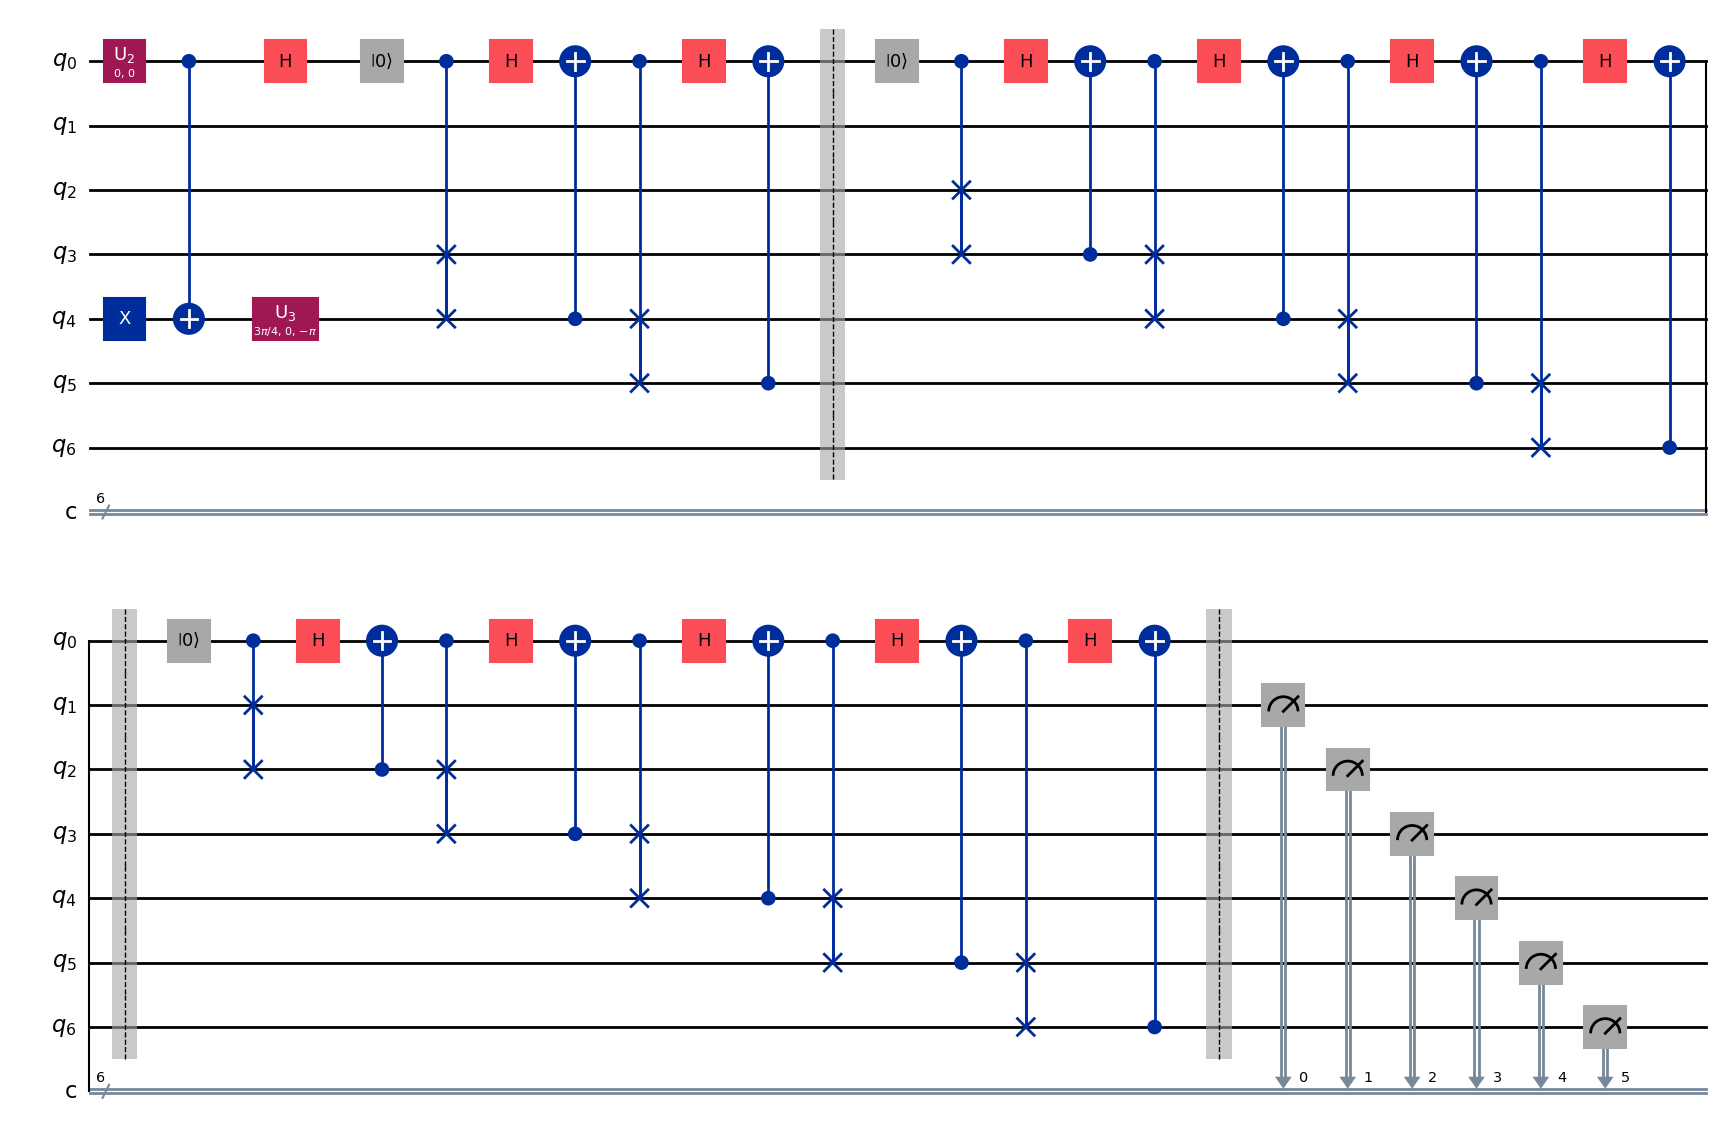

In [46]:
qc_pm3.draw("mpl")

In [48]:
from qiskit.quantum_info.analysis import hellinger_fidelity, hellinger_distance

hellinger_distance(result_n.result().get_counts(), result_3.get_counts())

0.03809949585772123

In [49]:
# lets calculate the hellinger distance and fidelity between ideal and noisy simulation
from qiskit.quantum_info.analysis import hellinger_fidelity, hellinger_distance

hellinger_fidelity(hadamard_noiseless_counts, counts_3)

0.9970989638908402